# Prediction Of Sales Using Linear Regression
### `Objective: The aim is to build a predictive model which find out the sales of each product at a particular store.`
#### Created and Summarized by Akanksha Saraswat

In [2]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
import statsmodels.api as sma
import statsmodels.stats.api as ssa
import statsmodels.formula.api as sfa
import statsmodels.stats.anova as smodels
from scipy.stats import probplot
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score , mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor


In [4]:
# import train dataset
train=pd.read_csv('train.csv' )
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [5]:
# import test dataset
test=pd.read_csv('test.csv')
test.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [6]:
# Understanding and Preprocessing Train Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [8]:
train.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [9]:
train.describe(exclude ='number')

,Item_ID,Item_Type,Outlet_ID,Outlet_Size,Outlet_Location_Type
count,87864,87864,87864,87864,87864
unique,895,16,5,3,3
top,FDE11,Baking Goods,OUT035,Small,Tier 1
freq,419,14666,24071,48614,33567


<AxesSubplot:ylabel='Outlet_Location_Type'>

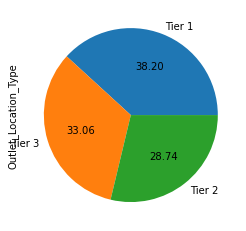

In [10]:
train['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%0.2f')

In [11]:
pd.crosstab([train['Outlet_Size'],train['Outlet_Location_Type']],columns=['Sales'],values=train['Sales'] , aggfunc='count')

col_0                             Sales
Outlet_Size Outlet_Location_Type       
High        Tier 1                 3807
            Tier 2                 3059
            Tier 3                 5701
Medium      Tier 1                 4995
            Tier 2                 3417
            Tier 3                18271
Small       Tier 1                24765
            Tier 2                18777
            Tier 3                 5072

* Inferences

In [12]:
# there are 895 items available at 5 different outlets of 3 different size in 3 different locations. 
# Most frequently bought item type is Baking goods 
# Out of five given outlet most popular is OUT035
# More than 50% of the outlets in the data are small in size . 
# Approximately all stores are equally available in all 3 Tier Locations. 

In [13]:
# minimum sales is negative , which can not be possible unless the sales is reflecting loss in total revenue.
# Assuming Sales here are reflecting revenue and is okay to proceed with -ive sales value .
# outliers: there are some stores which have extremely higher sales amount as compared to the other 75% of the stores, these are the potential high revenue generator stores.
# data contains store records, opened between year 1987 to 2009 .
# Since data is in different units it requires scaling.

----

## `Checking for null values`

In [14]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [15]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

**There are no missing values in the data .**

-----

## Checking for :
* `All real values in Numerical Columns`
* `No unwanted special characters in Categorical Columns`

In [16]:
train.select_dtypes(include=np.number).applymap(np.isreal).all()

Item_W         True
Item_MRP       True
Outlet_Year    True
Sales          True
dtype: bool

In [17]:
# data is clean all numerical column has real values.

In [18]:
cat_col=train.select_dtypes(include='object').columns  # checking for unwanted data items or characters in categorical columns.
for i in cat_col:
    print(i,train[i].unique())

Item_ID ['FDU32' 'NCT54' 'FDW08' 'FDJ22' 'FDF47' 'DRK12' 'FDA32' 'FDH24' 'FDW03'
 'FDE11' 'FDQ40' 'FDF56' 'FDC58' 'FDG32' 'FDS55' 'FDN46' 'NCY17' 'FDP40'
 'FDS35' 'FDY40' 'DRL01' 'FDY27' 'FDW28' 'FDX09' 'NCI54' 'FDR34' 'FDF08'
 'NCK05' 'FDG21' 'FDT34' 'DRI47' 'FDQ21' 'FDO32' 'FDJ04' 'NCT41' 'FDM08'
 'FDN21' 'FDQ31' 'FDS04' 'FDS34' 'FDK60' 'FDZ49' 'FDA43' 'DRJ51' 'NCL05'
 'NCA17' 'FDL38' 'FDS16' 'FDC41' 'FDU55' 'DRF25' 'NCB31' 'FDO09' 'FDP25'
 'FDE14' 'NCG42' 'FDD40' 'FDX36' 'FDU12' 'FDM04' 'FDV26' 'FDL50' 'FDJ60'
 'DRF01' 'FDE41' 'FDW52' 'NCL31' 'FDC35' 'FDZ45' 'FDZ58' 'DRD25' 'FDS49'
 'FDQ23' 'NCW54' 'FDI19' 'FDX23' 'FDL25' 'DRL11' 'FDX45' 'FDP52' 'FDD21'
 'NCO41' 'NCJ54' 'NCP17' 'FDR35' 'FDP16' 'FDI07' 'FDL44' 'FDH60' 'FDV55'
 'FDD52' 'DRK49' 'FDI15' 'FDR26' 'DRN47' 'DRF49' 'FDI14' 'FDB23' 'FDW48'
 'NCR05' 'NCV41' 'FDN13' 'NCN17' 'FDF52' 'FDT31' 'FDD47' 'FDA34' 'FDT43'
 'FDT45' 'NCS53' 'FDU45' 'FDC17' 'FDU40' 'FDF39' 'NCC54' 'NCG07' 'FDH47'
 'FDH05' 'FDS56' 'FDK58' 'DRM11' 'DRD24' 'F

In [19]:
# categorical variables do not contains unwanted items.

**Inference: Data is clean .**

-----

## `Data Visualization`

<Figure size 576x360 with 0 Axes>

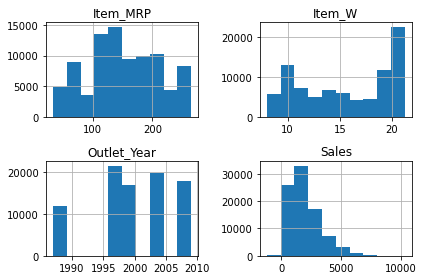

In [20]:
plt.figure(figsize=(8,5))
train.hist()
plt.tight_layout()
plt.show()

In [21]:
train.skew() # sales column is slightly skewed.

Item_W        -0.179534
Item_MRP       0.055661
Outlet_Year   -0.443312
Sales          1.125449
dtype: float64

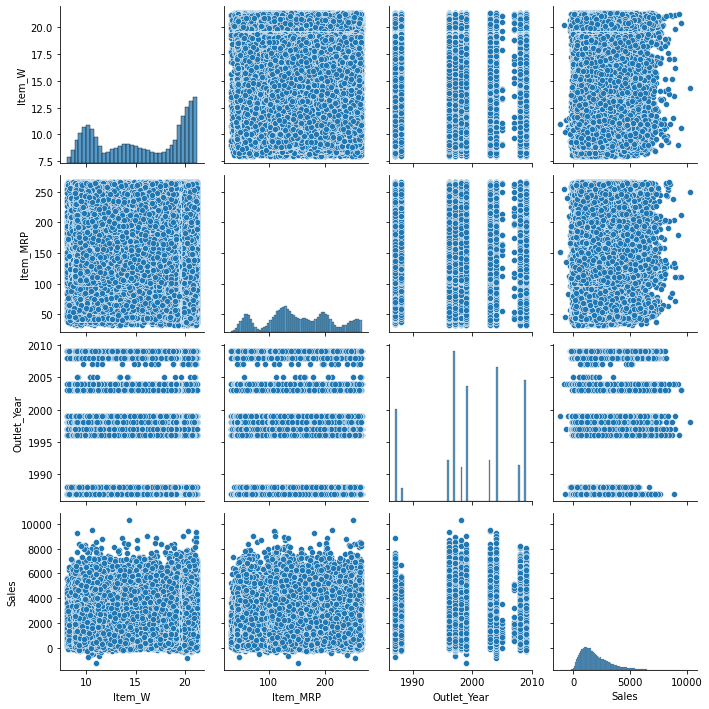

In [22]:
sns.pairplot(train)

* Independent Variales are not linearly distributed with Target Variable
* Item Weight and Item MRP are indifferent to Sales .

In [23]:
train.groupby('Item_Type')['Item_MRP','Item_W'].mean()

,Item_MRP,Item_W
Item_Type,,
Baking Goods,150.702459,15.053796
Breads,147.199312,15.270986
Breakfast,156.858735,16.637266
Canned,153.352637,16.179592
Dairy,155.376347,16.564873
Frozen Foods,154.739848,16.436911
Fruits and Vegetables,147.637898,15.340384
Hard Drinks,151.503811,14.901788
Health and Hygiene,154.309473,16.252626


In [24]:
## checking relationship between categorical and target variable 

<AxesSubplot:xlabel='Item_Type'>

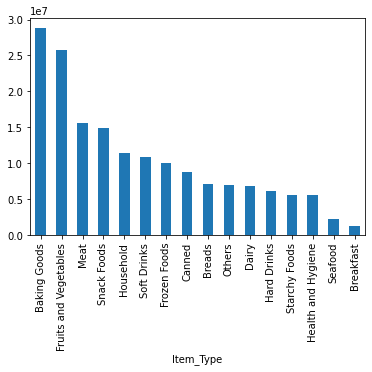

In [25]:
train.groupby('Item_Type')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

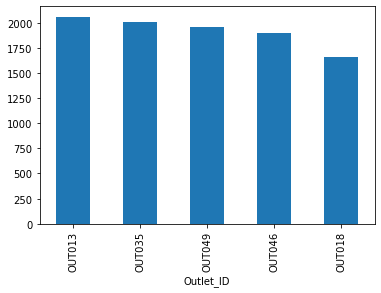

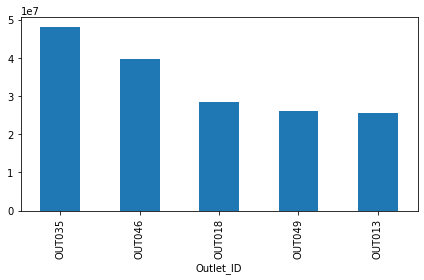

In [26]:
train.groupby('Outlet_ID')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()
train.groupby('Outlet_ID')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Outlet_Size'>

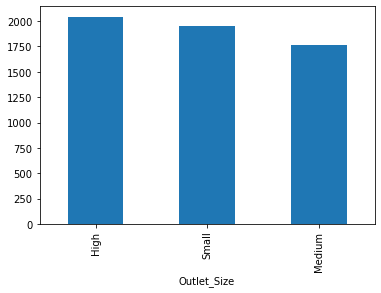

In [27]:
train.groupby('Outlet_Size')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')

In [28]:
train.groupby(['Outlet_Size','Outlet_Location_Type'])['Sales'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 1                   3807
             Tier 2                   3059
             Tier 3                   5701
Medium       Tier 1                   4995
             Tier 2                   3417
             Tier 3                  18271
Small        Tier 1                  24765
             Tier 2                  18777
             Tier 3                   5072
Name: Sales, dtype: int64

<AxesSubplot:>

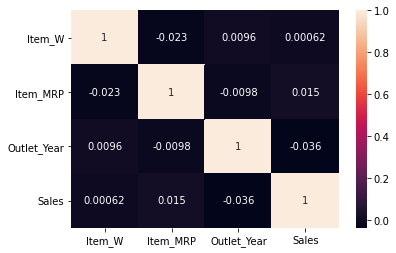

In [29]:
sns.heatmap(train.corr(),annot=True)

# `Understanding Outliers in the data`

<AxesSubplot:>

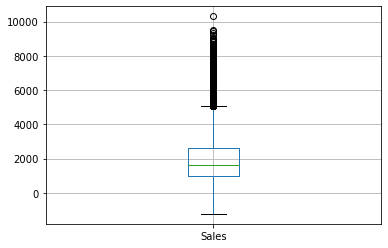

In [30]:
train[['Sales']].boxplot()

In [31]:
# most sales lies in the region 1000 , 6000
# some store sales are less than 0  as well.
# lets understand the outliers in details . 

In [32]:
q1=train.quantile(0.25)
q3=train.quantile(0.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR

In [33]:
IQR,ll,ul

(Item_W            9.001278
 Item_MRP         84.687030
 Outlet_Year       7.000000
 Sales          1648.808061
 dtype: float64,
 Item_W           -2.533259
 Item_MRP        -14.607209
 Outlet_Year    1986.500000
 Sales         -1513.962417
 dtype: float64,
 Item_W           33.471853
 Item_MRP        324.140912
 Outlet_Year    2014.500000
 Sales          5081.269828
 dtype: float64)

In [34]:
train_wto=train.copy()

In [35]:
train_wto=train[~((train<ll) | (train>ul)).any(axis=1)]

In [36]:
train_wto.shape,train.shape

((85486, 9), (87864, 9))

In [37]:
train_wto.skew()

Item_W        -0.180901
Item_MRP       0.057100
Outlet_Year   -0.443848
Sales          0.751510
dtype: float64

<AxesSubplot:>

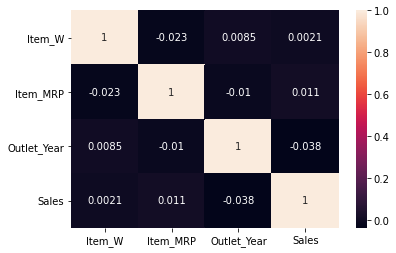

In [38]:
sns.heatmap(train_wto.corr(),annot=True)

In [39]:
# from the above heatmap we can say that the item weight has the least impact on Sales prediction.

# `Feature Engineering`

In [40]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder

In [41]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from sklearn.metrics import r2_score , mean_squared_error

In [145]:
train_data=train_wto.drop(['Item_ID','Item_Type','Outlet_ID'],axis=1)
test_data=test.drop(['Item_ID','Item_Type','Outlet_ID'],axis = 1)

In [43]:
train_data.head(1)

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,21.027499,197.352319,2004,Small,Tier 2,2689.457781


In [44]:
cat=train_data.select_dtypes(include='object')
cat.columns

Index(['Outlet_Size', 'Outlet_Location_Type'], dtype='object')

In [146]:
cat_test=test_data.select_dtypes(include='object')
cat_test.columns

Index(['Outlet_Size', 'Outlet_Location_Type'], dtype='object')

In [147]:
train_data=pd.get_dummies(train_data,columns=cat.columns )
test_data =pd.get_dummies(test_data,columns=cat_test.columns)

In [148]:
mm=MinMaxScaler()
train_data[['Item_W','Item_MRP']]=mm.fit_transform(train_data[['Item_W','Item_MRP']])
test_data[['Item_W','Item_MRP']]=mm.fit_transform(test_data[['Item_W','Item_MRP']])

In [149]:
train_data.head(2)

,Item_W,Item_MRP,Outlet_Year,Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.983217,0.707875,2004,2689.457781,0,0,1,0,1,0
1,0.988864,0.496505,1987,3437.350375,0,0,1,1,0,0


In [150]:
test_data.head(2)

,Item_W,Item_MRP,Outlet_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.333785,0.371765,1999,1,0,0,0,0,1
1,0.350463,0.993066,1987,1,0,0,0,0,1


# Base model

In [48]:
X=train_data.drop(['Sales'], axis=1)
Xc=sma.add_constant(X)
y=train_data.Sales

In [49]:
base_model=sma.OLS(y,Xc).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.24e-147
Time:                        21:18:34   Log-Likelihood:            -7.2142e+05
No. Observations:               85486   AIC:                         1.443e+06
Df Residuals:                   85478   BIC:                         1.443e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        4801.2560    713.604      6.728      0.000    3402.597    6199.915
Item_W                         15.1063     11.659      1.296      0.195      -7.746      37.958
Item_MRP                       39.1775     14.952      2.620      0.009       9.872      68.483
Outlet_Year                    -3.1048      0.595     -5.221      0.000      -4.270      -1.939
Outlet_Size_High             1699.5811    237.249      7.164      0.000    1234.574    2164.588
Outlet_Size_Medium           1502.2641    238.940      6.287      0.000    1033.944    1970.584
Outlet_Size_Small            1599.4108    237.700      6.729      0.000    1133.522    2065.300
Outlet_Location_Type_Tier 1  1613.3203    237.461      6.794      0.000    1147.898    2078.743
Outlet_Location_Type_Tier 2  1660.5017    237.661      6.987      0.000    1194.688    2126.316
Outlet_Location_Type_Tier 3  1527.4340    238.711      6.399      0.000    1059.562    1995.306
==============================================================================
Omnibus:                     6497.240   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8111.097
Skew:                           0.754   Prob(JB):                         0.00
Kurtosis:                       2.942   Cond. No.                     3.96e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
#Prediction Train
y_pred_ols=base_model.predict(Xc)

# R-Squared Train
r2_ols = r2_score(y,y_pred_ols)
print('Full Model Accuracy :',r2_ols)
print('----------------------------------------------------')
#Root mean squared error(RMSE) Train
rmse_ols = np.sqrt(mean_squared_error(y,y_pred_ols))
print('Full Model RMSE :',rmse_ols)

Full Model Accuracy : 0.008181890765286526
----------------------------------------------------
Full Model RMSE : 1118.9443622784074


# Next steps: 
    Test for Assumptions
    Building Model Using Best features
    Building Ensembling and Boosting Models with Scaled data: aim low RMSE and High accuracy
    Validating Scores on training and validation Sets 
    Give Predictions using Best Model

<a id="assumptions"> </a>
# `Assumptions`

### **1. Checking Linearity**

**Checking Linearity Using Rainbow Test**

In [51]:
# model linearity:: Rainbow Test
# Ho: Data is Linear
# H1: Data is not Linear

np.round(sma.stats.diagnostic.linear_rainbow(base_model),2)

#We can infer that since pvalue>0.05, we failed to reject H0 meaning Model follows Linearity

array([1.01, 0.25])

**Checking Linearity using ProbPlot**

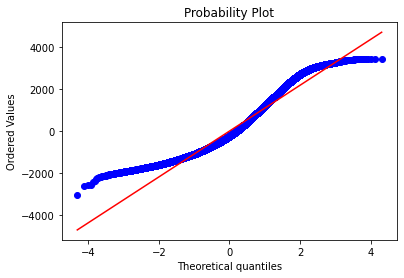

In [52]:
probplot(base_model.resid,plot=plt)
plt.show()

#residuals

**Conclusion: We can infer that Model follows Linearity**

### **2. Normality Tests**

In [53]:
# model Normality:: Shapiro Test
# Ho: Data is Normal
# H1: Data is not Normal

teststats, pvalue = stats.shapiro(base_model.resid)

print('Test Statistics:', teststats)
print('P-Value:', pvalue)

#If dataset > 5000, we must use or infer test-statistic as an indicator for checking normality
#Inference: Since our data > 5000 hence using teststats which is > 0.05, hence our data is normal.

Test Statistics: 0.9484091401100159
P-Value: 0.0


### 3. Multi-Collinearity

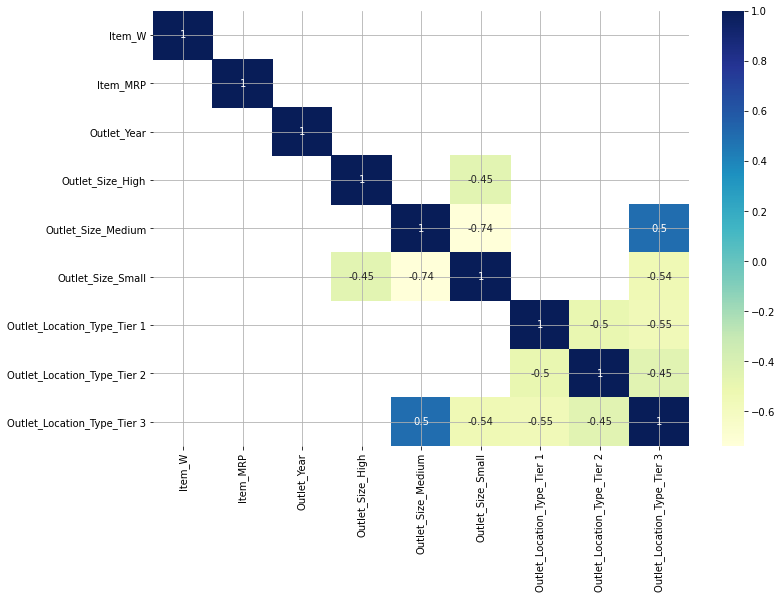

In [54]:
plt.figure(figsize = [12, 8])
sns.heatmap(X.corr()[np.abs(X.corr())>0.3], annot = True, cmap = "YlGnBu")
plt.grid()

In [55]:
vif_data = X

num_cols = vif_data.select_dtypes(include=np.number) # Predictor Variables..

mylist = [] # Store all the vif values

for i in range(vif_data.shape[1]):
    mylist.append(variance_inflation_factor(num_cols.values, i))

In [56]:
vif=pd.DataFrame({"Labels": num_cols.columns, "VIF": mylist})

In [57]:
vif.sort_values(by='VIF', ascending=False)

,Labels,VIF
3,Outlet_Size_High,inf
4,Outlet_Size_Medium,inf
5,Outlet_Size_Small,inf
6,Outlet_Location_Type_Tier 1,inf
7,Outlet_Location_Type_Tier 2,inf
8,Outlet_Location_Type_Tier 3,inf
2,Outlet_Year,1.067145
0,Item_W,1.006668
1,Item_MRP,1.001531


In [58]:
#Inference: VIF<10 for numerical columns and inf because these are encoded independent variable.

### Heteroskedasticity

In [59]:
# Breusch Pagan Test
#H0 : Error Variances are all equal
#H1 : Error Variances are not equal

localframe = pd.DataFrame(ssa.het_breuschpagan(base_model.resid, base_model.model.exog), 
                          columns = ["value"],
            index =["Test Stats", "PValue", "F-Test Stats", "Pr(F-Test)"])

localframe[2:]
# Conclusion: Reject the Ho meaning that there is uneven variance in the model

,value
F-Test Stats,6.645559e+00
Pr(F-Test),6.962635e-08


### Auto-Correlation

In [60]:
#H0:  The sequence was produced in a random manner
#H1:  The sequence was not produced in a random manner

AC = durbin_watson(base_model.resid)
AC

2.003792812953269

In [ ]:
# HO is true,distribution is random.

# `Building Model using best features`

In [61]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [62]:
lr=LinearRegression()

In [63]:
X=train_data.drop('Sales',axis=1)
y=train_data.Sales

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0 , test_size=0.25)

In [65]:
model=sfs(lr ,k_features='best',cv=5,scoring='r2')

In [66]:
model=model.fit(X_train,y_train)

In [67]:
best_features=list(model.k_feature_names_)
best_features

['Item_MRP',
 'Outlet_Year',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 3']

In [68]:
model.k_score_ 

0.008145766908911245

# Linear Regression

In [69]:
X=train_data[best_features]
y=train_data.Sales

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0 , test_size=0.25)

In [71]:
X_train.shape,y_train.shape

((64114, 6), (64114,))

In [72]:
lr=LinearRegression()

In [73]:
modelv1=lr.fit(X_train,y_train)

## Train Test Accuracy and RMSE

In [74]:
#Prediction Train
y_pred_train_v1=modelv1.predict(X_train)

# R-Squared Train
r2_train_v1 = r2_score(y_train,y_pred_train_v1)
print('r2_train_v1',r2_train_v1)

#Root mean squared error(RMSE) Train
rmse_train_v1 = np.sqrt(mean_squared_error(y_train,y_pred_train_v1))
print('rmse_train_v1',rmse_train_v1)

r2_train_v1 0.008450227530300114
rmse_train_v1 1118.8459985321142


## Test Accuracy and RMSE

In [75]:
#Prediction
y_pred_v1=modelv1.predict(X_test)

# R-Squared
r2_test_v1 = r2_score(y_test,y_pred_v1)
print('r2_test_v1',r2_test_v1)

#Root mean squared error(RMSE)
rmse_test_v1 = np.sqrt(mean_squared_error(y_test,y_pred_v1))
print('rmse_test_v1',rmse_test_v1)

r2_test_v1 0.0071746227590928635
rmse_test_v1 1119.3532567651775


# Default Decision Tree Regressor 

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
#Initializing the regressor 
dtr = DecisionTreeRegressor()

In [78]:
dtr_model = dtr.fit(X_train, y_train)

## Train Accuracy and RMSE - - DT Model

In [79]:
#Prediction Train
y_pred_train_dt=dtr_model.predict(X_train)

# R-Squared Train
r2_train_dt = r2_score(y_train,y_pred_train_dt)
print('r2_train_dt',r2_train_dt)

#Root mean squared error(RMSE) Train
rmse_train_dt = np.sqrt(mean_squared_error(y_train,y_pred_train_dt))
print('rmse_train_dt',rmse_train_dt)

r2_train_dt 0.9996940964732093
rmse_train_dt 19.65193393169433


## Test Accuracy and RMSE - - DT Model

In [80]:
#Prediction
y_pred_dt=dtr_model.predict(X_test)

# R-Squared
r2_test_dt = r2_score(y_test,y_pred_dt)
print('r2_test_dt',r2_test_dt)

#Root mean squared error(RMSE)
rmse_test_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))
print('rmse_test_dt',rmse_test_dt)

r2_test_dt -0.9745379801481973
rmse_test_dt 1578.5686673427813


In [81]:
# train accuracy > test accuracy implies model is overfit , 
# and here the Decision tree model is highly overfit.
# using random forest model to build less complex model to reduce overfiting .

-----

# Default Random Forest Regressor

In [82]:
#Initialization and Fitting
rfr=RandomForestRegressor()
rfr_model = rfr.fit(X_train, y_train)

## Train Accuracy and RMSE - - RF Model

In [83]:
#Prediction Train
y_pred_train_rfr=rfr_model.predict(X_train)

# R-Squared Train
r2_train_rfr = r2_score(y_train,y_pred_train_rfr)
print('r2_train_rfr',r2_train_rfr)

#Root mean squared error(RMSE) Train
rmse_train_rfr = np.sqrt(mean_squared_error(y_train,y_pred_train_rfr))
print('rmse_train_rfr',rmse_train_rfr)

r2_train_rfr 0.8170373074357051
rmse_train_rfr 480.6116842789314


## Test Accuracy and RMSE - - RF Model

In [84]:
#Prediction
y_pred_rfr=rfr_model.predict(X_test)

# R-Squared
r2_test_rfr = r2_score(y_test,y_pred_rfr)
print('r2_test_rfr',r2_test_rfr)

#Root mean squared error(RMSE)
rmse_test_rfr = np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print('rmse_test_rfr',rmse_test_rfr)

r2_test_rfr -0.3234331361243896
rmse_test_rfr 1292.3547238321548


In [85]:
# random forest model has reduced the overfit but
# random forest model is aslo overfit so now we are using regularization to reduce overfiting .

**Cross-Validation Results**

In [86]:
rfr_model_cv_r2 = cross_val_score(rfr_model, X_train, y_train, scoring='r2', cv=5)
scores=rfr_model_cv_r2.mean()
print('Random Forest Cross Validation Train Score ',scores)
print('-----------------------------------')
rfr_model_cv_r2 = cross_val_score(rfr_model, X_test, y_test, scoring='r2', cv=5) 
scores=rfr_model_cv_r2.mean()
print('Random Forest Cross Validation Test Score ',scores)

Random Forest Cross Validation Train Score  -0.3010904706965957
-----------------------------------
Random Forest Cross Validation Test Score  -0.2603336535945579


## Ridge

In [87]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)

In [88]:
#Prediction Train
y_pred_train_ridge=ridge_model.predict(X_train)

# R-Squared Train
r2_train_ridge = r2_score(y_train,y_pred_train_ridge)
print('r2_train_ridge',r2_train_ridge)

#Root mean squared error(RMSE) Train
rmse_train_ridge = np.sqrt(mean_squared_error(y_train,y_pred_train_ridge))
print('rmse_train_ridge',rmse_train_ridge)

r2_train_ridge 0.008450227326760817
rmse_train_ridge 1118.8459986469493


In [89]:
#Prediction
y_pred_ridge=ridge_model.predict(X_test)

# R-Squared
r2_test_ridge = r2_score(y_test,y_pred_ridge)
print('r2_test_ridge',r2_test_ridge)

#Root mean squared error(RMSE)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print('rmse_test_ridge',rmse_test_ridge)

r2_test_ridge 0.00717479650431474
rmse_test_ridge 1119.3531588213232


**Cross-Validation Results**

In [90]:
ridge_model_cv_r2 = cross_val_score(ridge_model, X_train, y_train, scoring='r2', cv=5)
scores=ridge_model_cv_r2.mean()
print('Ridge Cross Validation Train Score ',scores)
print('------------------------------------------------')
ridge_model_cv_r2 = cross_val_score(ridge_model, X_test, y_test, scoring='r2', cv=5)  
scores=ridge_model_cv_r2.mean()
print('Ridge Cross Validation Test Score ',scores)

Ridge Cross Validation Train Score  0.008145792342373582
------------------------------------------------
Ridge Cross Validation Test Score  0.0066100748512996745


## Lasso

In [91]:
lasso = Lasso()
lasso_model = lasso.fit(X_train, y_train)


In [92]:
#Prediction Train
y_pred_train_lasso=lasso_model.predict(X_train)

# R-Squared Train
r2_train_lasso = r2_score(y_train,y_pred_train_lasso)
print('r2_train_lasso',r2_train_lasso)

#Root mean squared error(RMSE) Train
rmse_train_lasso = np.sqrt(mean_squared_error(y_train,y_pred_train_lasso))
print('rmse_train_lasso',rmse_train_lasso)

r2_train_lasso 0.008393992004793405
rmse_train_lasso 1118.877725633644


In [93]:
#Prediction
y_pred_lasso=lasso_model.predict(X_test)

# R-Squared
r2_test_lasso = r2_score(y_test,y_pred_lasso)
print('r2_test_rfr',r2_test_lasso)

#Root mean squared error(RMSE)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print('rmse_test_rfr',rmse_test_lasso)

r2_test_rfr 0.007096943012151802
rmse_test_rfr 1119.3970456222091


**Cross-Validation Results**

In [94]:
lasso_model_cv_r2 = cross_val_score(lasso_model, X_train, y_train, scoring='r2', cv=5)
scores=lasso_model_cv_r2.mean()
print('lasso Cross Validation Train Score ',scores)
print('------------------------------------------------')
lasso_model_cv_r2 = cross_val_score(lasso_model, X_test, y_test, scoring='r2', cv=5)  
scores=lasso_model_cv_r2.mean()
print('lasso Cross Validation Test Score ',scores)

lasso Cross Validation Train Score  0.00809227914440951
------------------------------------------------
lasso Cross Validation Test Score  0.006559154210667506


# Bagging Regressor

In [95]:
from sklearn.svm import SVR

In [114]:
bag_model = BaggingRegressor(random_state=0).fit(X_train, y_train)

In [115]:
#Prediction Train
y_pred_train_bag=bag_model.predict(X_train)

# R-Squared Train
r2_train_bag = r2_score(y_train,y_pred_train_bag)
print('r2_train_bagging',r2_train_bag)

#Root mean squared error(RMSE) Train
rmse_train_bag = np.sqrt(mean_squared_error(y_train,y_pred_train_bag))
print('rmse_train_bagging',rmse_train_bag)

r2_train_bagging 0.7674605582571226
rmse_train_bagging 541.8279025199402


In [116]:
#Prediction
y_pred_bag=bag_model.predict(X_test)

# R-Squared
r2_test_bag = r2_score(y_test,y_pred_bag)
print('r2_test_bagging',r2_test_bag)

#Root mean squared error(RMSE)
rmse_test_bag = np.sqrt(mean_squared_error(y_test,y_pred_bag))
print('rmse_test_bagging',rmse_test_bag)

r2_test_bagging -0.3889909113129031
rmse_test_bagging 1323.9769810900739


**Cross-Validation Results**

In [117]:
bag_model_cv_r2 = cross_val_score(bag_model, X_train, y_train, scoring='r2', cv=5)
scores=bag_model_cv_r2.mean()
print('Bagging Cross Validation Train Score ',scores)
print('------------------------------------------------')
bag_model_cv_r2 = cross_val_score(bag_model, X_test, y_test, scoring='r2', cv=5)  
scores=bag_model_cv_r2.mean()
print('Bagging Cross Validation Test Score ',scores)

Bagging Cross Validation Train Score  -0.36591455353827823
------------------------------------------------
Bagging Cross Validation Test Score  -0.3242656521327093


# Gradient Boosting Regressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor  

In [95]:
gbr = GradientBoostingRegressor(random_state=0)

In [96]:
gbr_model = gbr.fit(X_train, y_train)

# Train Accuracy and RMSE - - GB Model

In [97]:
#Prediction Train
y_pred_train_gbr_grid=gbr_model.predict(X_train)

# R-Squared Train
r2_train_gbr_grid = r2_score(y_train,y_pred_train_gbr_grid)
print('r2_train_gbr_grid',r2_train_gbr_grid)

#Root mean squared error(RMSE) Train
rmse_train_gbr_grid = np.sqrt(mean_squared_error(y_train,y_pred_train_gbr_grid))
print('rmse_train_gbr_grid',rmse_train_gbr_grid)

r2_train_gbr_grid 0.023608590105725913
rmse_train_gbr_grid 1110.2608559909575


# Test Accuracy and RMSE - - GB Model

In [98]:
#Prediction
y_pred_gbr_grid=gbr_model.predict(X_test)

# R-Squared
r2_test_gbr_grid = r2_score(y_test,y_pred_gbr_grid)
print('r2_test_gbr_grid',r2_test_gbr_grid)

#Root mean squared error(RMSE)
rmse_test_gbr_grid = np.sqrt(mean_squared_error(y_test,y_pred_gbr_grid))
print('rmse_test_gbr_grid',rmse_test_gbr_grid)

r2_test_gbr_grid 0.017148434363355558
rmse_test_gbr_grid 1113.7166165741496


**Cross-Validation Results**

In [100]:
gbr_model_cv_r2 = cross_val_score(gbr_model, X_train, y_train, scoring='r2', cv=5)
scores=gbr_model_cv_r2.mean()
print('Gradient Boosting Regressor Cross Validation Train Score ',scores)
print('------------------------------------------------')
gbr_model_cv_r2 = cross_val_score(gbr_model, X_test, y_test, scoring='r2', cv=5)  
scores=gbr_model_cv_r2.mean()
print('Gradient Boosting Regressor Cross Validation Test Score ',scores)

Gradient Boosting Regressor Cross Validation Train Score  0.016622674819913464
------------------------------------------------
Gradient Boosting Regressor Cross Validation Test Score  0.012607470367211682


**The average test score is 0.86 and train is 0.87 .**

# XGBoost

In [108]:
from xgboost import XGBRegressor

In [110]:
# xgb = XGBRegressor()  #9255 , 8213
xgb = XGBRegressor(random_state=0)
xgb_model=xgb.fit(X_train,y_train)

## Train Accuracy and RMSE - - XGBRegressor

In [111]:
#Prediction Train
y_pred_train_xgb=xgb_model.predict(X_train)

# R-Squared Train
r2_train_xgb = r2_score(y_train,y_pred_train_xgb)
print('r2_train_xgb',r2_train_xgb)

#Root mean squared error(RMSE) Train
rmse_train_xgb = np.sqrt(mean_squared_error(y_train,y_pred_train_xgb))
print('rmse_train_xgb',rmse_train_xgb)

r2_train_xgb 0.09873769441569047
rmse_train_xgb 1066.691064606872


## Test Accuracy and RMSE - - XGBRegressor

In [112]:
#Prediction
y_pred_xgb=xgb_model.predict(X_test)

# R-Squared
r2_test_xgb = r2_score(y_test,y_pred_xgb)
print('r2_test_xgb',r2_test_xgb)

#Root mean squared error(RMSE)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
print('rmse_test_xgb',rmse_test_xgb)

r2_test_xgb 0.002566796641491731
rmse_test_xgb 1121.9477787505905


**Cross-Validation Results**

In [113]:
xgb_model_cv_r2 = cross_val_score(xgb_model, X_train, y_train, scoring='r2', cv=5)
scores=xgb_model_cv_r2.mean()
print('Xtreme Gradient Boosting Regressor Cross Validation Train Score ',scores)
print('------------------------------------------------')
xgb_model_cv_r2 = cross_val_score(xgb_model, X_test, y_test, scoring='r2', cv=5)  
scores=xgb_model_cv_r2.mean()
print('Xtreme Gradient Boosting Regressor Cross Validation Test Score ',scores)

Gradient Boosting Regressor Cross Validation Train Score  -0.0012970016030261044
------------------------------------------------
Gradient Boosting Regressor Cross Validation Test Score  -0.034383137261151345


# LGBMEstimator 

In [101]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [102]:
import lightgbm
from lightgbm import LGBMRegressor

In [103]:
lgbm_model=LGBMRegressor(random_state=0).fit(X_train,y_train)

In [104]:
#Prediction Train
y_pred_train_lgbm=lgbm_model.predict(X_train)

# R-Squared Train
r2_train_lgbm = r2_score(y_train,y_pred_train_lgbm)
print('r2_train_lgbm',r2_train_lgbm)

#Root mean squared error(RMSE) Train
rmse_train_lgbm = np.sqrt(mean_squared_error(y_train,y_pred_train_lgbm))
print('rmse_train_lgbm',rmse_train_lgbm)

r2_train_lgbm 0.03901487437179629
rmse_train_lgbm 1101.4667361891313


In [105]:
#Prediction
y_pred_lgbm=lgbm_model.predict(X_test)

# R-Squared
r2_test_lgbm = r2_score(y_test,y_pred_lgbm)
print('r2_test_lgbm',r2_test_lgbm)

#Root mean squared error(RMSE)
rmse_test_lgbm = np.sqrt(mean_squared_error(y_test,y_pred_lgbm))
print('rmse_test_lgbm',rmse_test_lgbm)

r2_test_lgbm 0.014719463959823376
rmse_test_lgbm 1115.0919592461778


**Cross-Validation Results**

In [107]:
lgbm_model_cv_r2 = cross_val_score(lgbm_model, X_train, y_train, scoring='r2', cv=5)
scores=lgbm_model_cv_r2.mean()
print('Light Gradient Boosting Regressor Cross Validation Train Score ',scores)
print('------------------------------------------------')
lgbm_model_cv_r2 = cross_val_score(lgbm_model, X_test, y_test, scoring='r2', cv=5)  
scores=lgbm_model_cv_r2.mean()
print('Light Gradient Boosting Regressor Cross Validation Test Score ',scores)

Light Gradient Boosting Regressor Cross Validation Train Score  0.012994419291992099
------------------------------------------------
Light Gradient Boosting Regressor Cross Validation Test Score  -0.0008209517434769609


# AdaBoostRegressor

In [118]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
abr = AdaBoostRegressor(base_estimator=Ridge() ,learning_rate=0.1,
                        random_state=0)

In [120]:
abr_model=abr.fit(X_train,y_train)

In [121]:
#Prediction Train
y_pred_train_abr=abr_model.predict(X_train)

# R-Squared Train
r2_train_abr = r2_score(y_train,y_pred_train_abr)
print('r2_train_rfr',r2_train_abr)

#Root mean squared error(RMSE) Train
rmse_train_abr = np.sqrt(mean_squared_error(y_train,y_pred_train_abr))
print('rmse_train_rfr',rmse_train_abr)

r2_train_rfr -0.010337640122655367
rmse_train_rfr 1129.3961939762016


In [122]:
#Prediction
y_pred_abr=abr_model.predict(X_test)

# R-Squared
r2_test_abr = r2_score(y_test,y_pred_abr)
print('r2_test_rfr',r2_test_abr)

#Root mean squared error(RMSE)
rmse_test_abr = np.sqrt(mean_squared_error(y_test,y_pred_abr))
print('rmse_test_rfr',rmse_test_abr)

r2_test_rfr -0.011386889565086822
rmse_test_rfr 1129.768319519945


**Cross-Validation Results**

In [125]:
abr_model_cv_r2 = cross_val_score(abr_model, X_train, y_train, scoring='r2', cv=5)
scores=abr_model_cv_r2.mean()
print('Ada Boosting Regressor Cross Validation Train Score ',scores)
print('------------------------------------------------')
abr_model_cv_r2 = cross_val_score(abr_model, X_test, y_test, scoring='r2', cv=5)  
scores=abr_model_cv_r2.mean()
print('Ada Boosting Regressor Cross Validation Test Score ',scores)

Ada Boosting Regressor Cross Validation Train Score  -0.010201556660757394
------------------------------------------------
Ada Boosting Regressor Cross Validation Test Score  -0.009716023559477094


# CatBoostRegressor

In [126]:
from catboost import CatBoostRegressor

In [129]:
cat = CatBoostRegressor(learning_rate=1,random_state=0)
cat_model=cat.fit(X_train,y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1117.1808067	total: 16.5ms	remaining: 16.4s
1:	learn: 1115.0197026	total: 36.3ms	remaining: 18.1s
2:	learn: 1113.9626920	total: 64.8ms	remaining: 21.5s
3:	learn: 1113.0752113	total: 84.6ms	remaining: 21.1s
4:	learn: 1112.6643358	total: 101ms	remaining: 20.1s
5:	learn: 1112.6157345	total: 112ms	remaining: 18.6s
6:	learn: 1112.2773717	total: 127ms	remaining: 18.1s
7:	learn: 1111.9851885	total: 142ms	remaining: 17.6s
8:	learn: 1111.6355087	total: 154ms	remaining: 17s
9:	learn: 1111.3165965	total: 171ms	remaining: 16.9s
10:	learn: 1111.1972445	total: 187ms	remaining: 16.8s
11:	learn: 1110.8002014	total: 204ms	remaining: 16.8s
12:	learn: 1110.4938715	total: 218ms	remaining: 16.5s
13:	learn: 1110.2318218	total: 233ms	remaining: 16.4s
14:	learn: 1110.0227256	total: 248ms	remaining: 16.3s
15:	learn: 1109.6616186	total: 264ms	remaining: 16.2s
16:	learn: 1109.4602416	total: 280ms	remaining: 16.2s
17:	learn: 1109.2698434	total: 295ms	remaining: 16.1s
18:	learn: 1108.9729079	total: 311ms

158:	learn: 1086.8042274	total: 2.37s	remaining: 12.5s
159:	learn: 1086.6648841	total: 2.38s	remaining: 12.5s
160:	learn: 1086.5870022	total: 2.39s	remaining: 12.5s
161:	learn: 1086.5228445	total: 2.4s	remaining: 12.4s
162:	learn: 1086.3748297	total: 2.41s	remaining: 12.4s
163:	learn: 1086.2796462	total: 2.42s	remaining: 12.4s
164:	learn: 1086.2075365	total: 2.44s	remaining: 12.4s
165:	learn: 1086.0988987	total: 2.46s	remaining: 12.4s
166:	learn: 1085.9606766	total: 2.47s	remaining: 12.3s
167:	learn: 1085.9063120	total: 2.49s	remaining: 12.3s
168:	learn: 1085.7917711	total: 2.51s	remaining: 12.3s
169:	learn: 1085.6918137	total: 2.52s	remaining: 12.3s
170:	learn: 1085.5999856	total: 2.54s	remaining: 12.3s
171:	learn: 1085.4640991	total: 2.56s	remaining: 12.3s
172:	learn: 1085.3082816	total: 2.57s	remaining: 12.3s
173:	learn: 1085.2255797	total: 2.58s	remaining: 12.3s
174:	learn: 1085.1507223	total: 2.6s	remaining: 12.2s
175:	learn: 1085.0250127	total: 2.61s	remaining: 12.2s
176:	learn: 

316:	learn: 1071.8738781	total: 4.79s	remaining: 10.3s
317:	learn: 1071.8420448	total: 4.81s	remaining: 10.3s
318:	learn: 1071.8150801	total: 4.82s	remaining: 10.3s
319:	learn: 1071.7653365	total: 4.83s	remaining: 10.3s
320:	learn: 1071.6538013	total: 4.85s	remaining: 10.3s
321:	learn: 1071.5610808	total: 4.87s	remaining: 10.2s
322:	learn: 1071.5092482	total: 4.88s	remaining: 10.2s
323:	learn: 1071.3740806	total: 4.9s	remaining: 10.2s
324:	learn: 1071.2818719	total: 4.92s	remaining: 10.2s
325:	learn: 1071.2535232	total: 4.94s	remaining: 10.2s
326:	learn: 1071.1738984	total: 4.95s	remaining: 10.2s
327:	learn: 1071.1494107	total: 4.97s	remaining: 10.2s
328:	learn: 1071.0152825	total: 4.98s	remaining: 10.2s
329:	learn: 1070.9780036	total: 5s	remaining: 10.2s
330:	learn: 1070.8574651	total: 5.02s	remaining: 10.1s
331:	learn: 1070.7101336	total: 5.03s	remaining: 10.1s
332:	learn: 1070.6901353	total: 5.05s	remaining: 10.1s
333:	learn: 1070.6678171	total: 5.06s	remaining: 10.1s
334:	learn: 10

469:	learn: 1062.3909216	total: 7.19s	remaining: 8.1s
470:	learn: 1062.3421585	total: 7.2s	remaining: 8.08s
471:	learn: 1062.3123714	total: 7.21s	remaining: 8.06s
472:	learn: 1062.2913175	total: 7.22s	remaining: 8.04s
473:	learn: 1062.2819732	total: 7.24s	remaining: 8.03s
474:	learn: 1062.1530560	total: 7.25s	remaining: 8.02s
475:	learn: 1062.1374078	total: 7.27s	remaining: 8s
476:	learn: 1062.1047797	total: 7.29s	remaining: 7.99s
477:	learn: 1062.0533018	total: 7.3s	remaining: 7.97s
478:	learn: 1062.0410632	total: 7.32s	remaining: 7.96s
479:	learn: 1062.0228221	total: 7.33s	remaining: 7.95s
480:	learn: 1061.9789277	total: 7.35s	remaining: 7.93s
481:	learn: 1061.9001782	total: 7.37s	remaining: 7.92s
482:	learn: 1061.8452721	total: 7.38s	remaining: 7.9s
483:	learn: 1061.7676061	total: 7.39s	remaining: 7.88s
484:	learn: 1061.6690035	total: 7.4s	remaining: 7.86s
485:	learn: 1061.6240945	total: 7.42s	remaining: 7.85s
486:	learn: 1061.5950475	total: 7.44s	remaining: 7.83s
487:	learn: 1061.5

623:	learn: 1054.5188239	total: 9.6s	remaining: 5.78s
624:	learn: 1054.4766647	total: 9.61s	remaining: 5.76s
625:	learn: 1054.3492328	total: 9.62s	remaining: 5.75s
626:	learn: 1054.2899254	total: 9.63s	remaining: 5.73s
627:	learn: 1054.2791257	total: 9.65s	remaining: 5.71s
628:	learn: 1054.1932582	total: 9.66s	remaining: 5.7s
629:	learn: 1054.1691740	total: 9.68s	remaining: 5.68s
630:	learn: 1054.0705616	total: 9.7s	remaining: 5.67s
631:	learn: 1054.0455889	total: 9.71s	remaining: 5.66s
632:	learn: 1053.9813866	total: 9.73s	remaining: 5.64s
633:	learn: 1053.9703529	total: 9.74s	remaining: 5.63s
634:	learn: 1053.9521472	total: 9.76s	remaining: 5.61s
635:	learn: 1053.9099073	total: 9.78s	remaining: 5.6s
636:	learn: 1053.8606506	total: 9.8s	remaining: 5.58s
637:	learn: 1053.8307824	total: 9.81s	remaining: 5.57s
638:	learn: 1053.7982180	total: 9.82s	remaining: 5.55s
639:	learn: 1053.7651048	total: 9.84s	remaining: 5.53s
640:	learn: 1053.7251311	total: 9.85s	remaining: 5.52s
641:	learn: 105

780:	learn: 1048.3911396	total: 12s	remaining: 3.36s
781:	learn: 1048.3497699	total: 12s	remaining: 3.35s
782:	learn: 1048.3380478	total: 12s	remaining: 3.33s
783:	learn: 1048.3226668	total: 12s	remaining: 3.31s
784:	learn: 1048.2967419	total: 12s	remaining: 3.3s
785:	learn: 1048.2807930	total: 12.1s	remaining: 3.28s
786:	learn: 1048.2620270	total: 12.1s	remaining: 3.27s
787:	learn: 1048.2092978	total: 12.1s	remaining: 3.25s
788:	learn: 1048.1728515	total: 12.1s	remaining: 3.24s
789:	learn: 1048.1382785	total: 12.1s	remaining: 3.22s
790:	learn: 1048.1093160	total: 12.1s	remaining: 3.21s
791:	learn: 1048.0409329	total: 12.1s	remaining: 3.19s
792:	learn: 1048.0055290	total: 12.2s	remaining: 3.17s
793:	learn: 1047.9660141	total: 12.2s	remaining: 3.16s
794:	learn: 1047.9411370	total: 12.2s	remaining: 3.14s
795:	learn: 1047.8646472	total: 12.2s	remaining: 3.13s
796:	learn: 1047.8388031	total: 12.2s	remaining: 3.11s
797:	learn: 1047.8252854	total: 12.2s	remaining: 3.09s
798:	learn: 1047.7918

934:	learn: 1043.1895590	total: 14.2s	remaining: 985ms
935:	learn: 1043.0809404	total: 14.2s	remaining: 970ms
936:	learn: 1043.0483246	total: 14.2s	remaining: 954ms
937:	learn: 1043.0298681	total: 14.2s	remaining: 939ms
938:	learn: 1042.9636403	total: 14.2s	remaining: 924ms
939:	learn: 1042.9207184	total: 14.2s	remaining: 909ms
940:	learn: 1042.8798789	total: 14.3s	remaining: 894ms
941:	learn: 1042.8641036	total: 14.3s	remaining: 879ms
942:	learn: 1042.8516405	total: 14.3s	remaining: 864ms
943:	learn: 1042.8376239	total: 14.3s	remaining: 849ms
944:	learn: 1042.8275327	total: 14.3s	remaining: 834ms
945:	learn: 1042.7704632	total: 14.3s	remaining: 819ms
946:	learn: 1042.7483873	total: 14.4s	remaining: 804ms
947:	learn: 1042.7238195	total: 14.4s	remaining: 788ms
948:	learn: 1042.6991026	total: 14.4s	remaining: 773ms
949:	learn: 1042.6773343	total: 14.4s	remaining: 758ms
950:	learn: 1042.6551900	total: 14.4s	remaining: 743ms
951:	learn: 1042.5807598	total: 14.4s	remaining: 728ms
952:	learn

In [130]:
#Prediction Train
y_pred_train_cat=cat_model.predict(X_train)

# R-Squared Train
r2_train_cat = r2_score(y_train,y_pred_train_cat)
print('r2_train_rfr',r2_train_cat)

#Root mean squared error(RMSE) Train
rmse_train_cat = np.sqrt(mean_squared_error(y_train,y_pred_train_cat))
print('rmse_train_rfr',rmse_train_cat)

r2_train_rfr 0.1413107561871858
rmse_train_rfr 1041.1925807842488


In [131]:
#Prediction
y_pred_cat=cat_model.predict(X_test)

# R-Squared
r2_test_cat = r2_score(y_test,y_pred_cat)
print('r2_test_rfr',r2_test_cat)

#Root mean squared error(RMSE)
rmse_test_cat = np.sqrt(mean_squared_error(y_test,y_pred_cat))
print('rmse_test_rfr',rmse_test_cat)

r2_test_rfr -0.07699772520512638
rmse_test_rfr 1165.8377814478215


**Cross-Validation Results**

In [132]:
cat_model_cv_r2 = cross_val_score(cat_model, X_train, y_train, scoring='r2', cv=5)
scores=cat_model_cv_r2.mean()
print('CatBoost Regressor Cross Validation Train Score ',scores)
print('------------------------------------------------')
cat_model_cv_r2 = cross_val_score(cat_model, X_test, y_test, scoring='r2', cv=5)  
scores=cat_model_cv_r2.mean()
print('CatBoost Regressor Cross Validation Test Score ',scores)

0:	learn: 1115.6977562	total: 13.6ms	remaining: 13.6s
1:	learn: 1113.2667931	total: 28.5ms	remaining: 14.2s
2:	learn: 1111.8737683	total: 42.9ms	remaining: 14.3s
3:	learn: 1111.1076983	total: 57.3ms	remaining: 14.3s
4:	learn: 1110.8418384	total: 76.8ms	remaining: 15.3s
5:	learn: 1110.5853188	total: 92.6ms	remaining: 15.3s
6:	learn: 1110.0868130	total: 108ms	remaining: 15.3s
7:	learn: 1109.5269071	total: 123ms	remaining: 15.2s
8:	learn: 1109.2895297	total: 137ms	remaining: 15.1s
9:	learn: 1109.0791565	total: 151ms	remaining: 14.9s
10:	learn: 1109.0791564	total: 159ms	remaining: 14.3s
11:	learn: 1108.8692203	total: 172ms	remaining: 14.2s
12:	learn: 1108.5309295	total: 187ms	remaining: 14.2s
13:	learn: 1108.1600575	total: 200ms	remaining: 14.1s
14:	learn: 1107.6215816	total: 215ms	remaining: 14.1s
15:	learn: 1107.3178426	total: 224ms	remaining: 13.8s
16:	learn: 1106.9944387	total: 235ms	remaining: 13.6s
17:	learn: 1106.8059415	total: 246ms	remaining: 13.4s
18:	learn: 1106.4719177	total: 2

154:	learn: 1078.3776178	total: 2.02s	remaining: 11s
155:	learn: 1078.3075486	total: 2.03s	remaining: 11s
156:	learn: 1078.1917705	total: 2.04s	remaining: 11s
157:	learn: 1078.0361851	total: 2.05s	remaining: 10.9s
158:	learn: 1077.8224010	total: 2.06s	remaining: 10.9s
159:	learn: 1077.7168599	total: 2.08s	remaining: 10.9s
160:	learn: 1077.5961650	total: 2.09s	remaining: 10.9s
161:	learn: 1077.4317029	total: 2.1s	remaining: 10.9s
162:	learn: 1077.1924212	total: 2.12s	remaining: 10.9s
163:	learn: 1077.1515544	total: 2.13s	remaining: 10.9s
164:	learn: 1077.0230810	total: 2.15s	remaining: 10.9s
165:	learn: 1076.8160983	total: 2.16s	remaining: 10.9s
166:	learn: 1076.7176297	total: 2.18s	remaining: 10.9s
167:	learn: 1076.6250324	total: 2.19s	remaining: 10.8s
168:	learn: 1076.5227007	total: 2.2s	remaining: 10.8s
169:	learn: 1076.3536722	total: 2.22s	remaining: 10.9s
170:	learn: 1076.2670210	total: 2.24s	remaining: 10.8s
171:	learn: 1076.1134442	total: 2.25s	remaining: 10.8s
172:	learn: 1075.9

306:	learn: 1060.9402249	total: 4.03s	remaining: 9.1s
307:	learn: 1060.9096067	total: 4.04s	remaining: 9.09s
308:	learn: 1060.6450347	total: 4.05s	remaining: 9.07s
309:	learn: 1060.5878040	total: 4.06s	remaining: 9.05s
310:	learn: 1060.5235079	total: 4.08s	remaining: 9.03s
311:	learn: 1060.4744325	total: 4.09s	remaining: 9.02s
312:	learn: 1060.4383914	total: 4.1s	remaining: 9.01s
313:	learn: 1060.3452291	total: 4.12s	remaining: 9s
314:	learn: 1060.2787458	total: 4.13s	remaining: 8.99s
315:	learn: 1060.2281079	total: 4.15s	remaining: 8.98s
316:	learn: 1060.0692402	total: 4.16s	remaining: 8.97s
317:	learn: 1060.0240838	total: 4.17s	remaining: 8.96s
318:	learn: 1059.9338852	total: 4.19s	remaining: 8.95s
319:	learn: 1059.7155492	total: 4.21s	remaining: 8.95s
320:	learn: 1059.5094067	total: 4.22s	remaining: 8.94s
321:	learn: 1059.4267898	total: 4.24s	remaining: 8.93s
322:	learn: 1059.3464477	total: 4.25s	remaining: 8.92s
323:	learn: 1059.2924382	total: 4.27s	remaining: 8.9s
324:	learn: 1059

462:	learn: 1048.1237092	total: 6.18s	remaining: 7.16s
463:	learn: 1048.0630067	total: 6.19s	remaining: 7.15s
464:	learn: 1048.0413172	total: 6.2s	remaining: 7.13s
465:	learn: 1048.0272945	total: 6.2s	remaining: 7.11s
466:	learn: 1047.9591592	total: 6.22s	remaining: 7.1s
467:	learn: 1047.8557965	total: 6.23s	remaining: 7.08s
468:	learn: 1047.7266438	total: 6.25s	remaining: 7.07s
469:	learn: 1047.6816789	total: 6.26s	remaining: 7.06s
470:	learn: 1047.6315336	total: 6.28s	remaining: 7.05s
471:	learn: 1047.6172078	total: 6.29s	remaining: 7.04s
472:	learn: 1047.5733428	total: 6.3s	remaining: 7.02s
473:	learn: 1047.5339992	total: 6.32s	remaining: 7.01s
474:	learn: 1047.4819825	total: 6.33s	remaining: 7s
475:	learn: 1047.4083927	total: 6.35s	remaining: 6.99s
476:	learn: 1047.2752181	total: 6.36s	remaining: 6.97s
477:	learn: 1047.1923244	total: 6.38s	remaining: 6.96s
478:	learn: 1047.1634255	total: 6.39s	remaining: 6.95s
479:	learn: 1047.0494945	total: 6.4s	remaining: 6.93s
480:	learn: 1046.9

612:	learn: 1039.5141862	total: 8.14s	remaining: 5.14s
613:	learn: 1039.4861310	total: 8.15s	remaining: 5.13s
614:	learn: 1039.4492397	total: 8.16s	remaining: 5.11s
615:	learn: 1039.4200904	total: 8.17s	remaining: 5.09s
616:	learn: 1039.3369332	total: 8.18s	remaining: 5.08s
617:	learn: 1039.2825062	total: 8.19s	remaining: 5.07s
618:	learn: 1039.2225580	total: 8.2s	remaining: 5.05s
619:	learn: 1039.2016620	total: 8.22s	remaining: 5.04s
620:	learn: 1039.1375124	total: 8.23s	remaining: 5.02s
621:	learn: 1039.0677524	total: 8.24s	remaining: 5.01s
622:	learn: 1039.0011818	total: 8.25s	remaining: 4.99s
623:	learn: 1038.9501966	total: 8.27s	remaining: 4.98s
624:	learn: 1038.8975206	total: 8.28s	remaining: 4.97s
625:	learn: 1038.8786552	total: 8.29s	remaining: 4.96s
626:	learn: 1038.7924268	total: 8.31s	remaining: 4.94s
627:	learn: 1038.7567330	total: 8.32s	remaining: 4.93s
628:	learn: 1038.6898291	total: 8.33s	remaining: 4.91s
629:	learn: 1038.6634499	total: 8.34s	remaining: 4.9s
630:	learn: 

768:	learn: 1031.9061865	total: 10.3s	remaining: 3.09s
769:	learn: 1031.8515416	total: 10.3s	remaining: 3.08s
770:	learn: 1031.8293561	total: 10.3s	remaining: 3.06s
771:	learn: 1031.7875782	total: 10.3s	remaining: 3.05s
772:	learn: 1031.7658802	total: 10.3s	remaining: 3.03s
773:	learn: 1031.7394582	total: 10.3s	remaining: 3.02s
774:	learn: 1031.6693369	total: 10.4s	remaining: 3.01s
775:	learn: 1031.6110500	total: 10.4s	remaining: 3s
776:	learn: 1031.5921357	total: 10.4s	remaining: 2.98s
777:	learn: 1031.5813297	total: 10.4s	remaining: 2.97s
778:	learn: 1031.4978128	total: 10.4s	remaining: 2.96s
779:	learn: 1031.4745547	total: 10.4s	remaining: 2.94s
780:	learn: 1031.3822394	total: 10.4s	remaining: 2.93s
781:	learn: 1031.3638710	total: 10.5s	remaining: 2.92s
782:	learn: 1031.2836173	total: 10.5s	remaining: 2.9s
783:	learn: 1031.2527990	total: 10.5s	remaining: 2.89s
784:	learn: 1031.2181537	total: 10.5s	remaining: 2.88s
785:	learn: 1031.1303543	total: 10.5s	remaining: 2.86s
786:	learn: 10

919:	learn: 1026.0510529	total: 12.3s	remaining: 1.07s
920:	learn: 1026.0462235	total: 12.3s	remaining: 1.06s
921:	learn: 1025.9922543	total: 12.3s	remaining: 1.04s
922:	learn: 1025.9578521	total: 12.3s	remaining: 1.03s
923:	learn: 1025.9185222	total: 12.4s	remaining: 1.02s
924:	learn: 1025.9047100	total: 12.4s	remaining: 1s
925:	learn: 1025.8717228	total: 12.4s	remaining: 990ms
926:	learn: 1025.8263369	total: 12.4s	remaining: 976ms
927:	learn: 1025.8192421	total: 12.4s	remaining: 963ms
928:	learn: 1025.7986461	total: 12.4s	remaining: 950ms
929:	learn: 1025.7912127	total: 12.4s	remaining: 937ms
930:	learn: 1025.7459882	total: 12.5s	remaining: 924ms
931:	learn: 1025.7291630	total: 12.5s	remaining: 911ms
932:	learn: 1025.6937816	total: 12.5s	remaining: 897ms
933:	learn: 1025.6672620	total: 12.5s	remaining: 884ms
934:	learn: 1025.6431162	total: 12.5s	remaining: 871ms
935:	learn: 1025.5892484	total: 12.5s	remaining: 857ms
936:	learn: 1025.5628420	total: 12.6s	remaining: 844ms
937:	learn: 1

80:	learn: 1094.8778801	total: 1.77s	remaining: 20.1s
81:	learn: 1094.6209830	total: 1.78s	remaining: 20s
82:	learn: 1094.4524368	total: 1.79s	remaining: 19.8s
83:	learn: 1094.3190120	total: 1.8s	remaining: 19.6s
84:	learn: 1094.1707750	total: 1.81s	remaining: 19.5s
85:	learn: 1093.9366724	total: 1.83s	remaining: 19.4s
86:	learn: 1093.7404654	total: 1.84s	remaining: 19.3s
87:	learn: 1093.5783880	total: 1.86s	remaining: 19.3s
88:	learn: 1093.3748963	total: 1.88s	remaining: 19.2s
89:	learn: 1093.1143142	total: 1.89s	remaining: 19.1s
90:	learn: 1092.9441916	total: 1.91s	remaining: 19s
91:	learn: 1092.8408890	total: 1.92s	remaining: 18.9s
92:	learn: 1092.6946958	total: 1.93s	remaining: 18.9s
93:	learn: 1092.5431585	total: 1.95s	remaining: 18.8s
94:	learn: 1092.4354435	total: 1.96s	remaining: 18.7s
95:	learn: 1092.2547914	total: 1.98s	remaining: 18.6s
96:	learn: 1092.0966183	total: 1.99s	remaining: 18.5s
97:	learn: 1091.9320258	total: 2s	remaining: 18.4s
98:	learn: 1091.8138909	total: 2.01s

234:	learn: 1071.9911803	total: 3.9s	remaining: 12.7s
235:	learn: 1071.9095394	total: 3.92s	remaining: 12.7s
236:	learn: 1071.8478793	total: 3.93s	remaining: 12.6s
237:	learn: 1071.6996055	total: 3.94s	remaining: 12.6s
238:	learn: 1071.5847597	total: 3.94s	remaining: 12.6s
239:	learn: 1071.5003644	total: 3.96s	remaining: 12.5s
240:	learn: 1071.3829233	total: 3.97s	remaining: 12.5s
241:	learn: 1071.3214700	total: 3.98s	remaining: 12.5s
242:	learn: 1071.1644090	total: 3.99s	remaining: 12.4s
243:	learn: 1071.0302645	total: 4.01s	remaining: 12.4s
244:	learn: 1070.8883928	total: 4.02s	remaining: 12.4s
245:	learn: 1070.7222043	total: 4.03s	remaining: 12.4s
246:	learn: 1070.5984394	total: 4.04s	remaining: 12.3s
247:	learn: 1070.4991616	total: 4.06s	remaining: 12.3s
248:	learn: 1070.3391782	total: 4.07s	remaining: 12.3s
249:	learn: 1070.2631715	total: 4.09s	remaining: 12.3s
250:	learn: 1070.0959406	total: 4.1s	remaining: 12.2s
251:	learn: 1069.9363890	total: 4.11s	remaining: 12.2s
252:	learn: 

397:	learn: 1056.9273684	total: 6.09s	remaining: 9.22s
398:	learn: 1056.8865964	total: 6.11s	remaining: 9.2s
399:	learn: 1056.7595841	total: 6.12s	remaining: 9.17s
400:	learn: 1056.7493286	total: 6.12s	remaining: 9.15s
401:	learn: 1056.6373128	total: 6.13s	remaining: 9.13s
402:	learn: 1056.6040163	total: 6.15s	remaining: 9.11s
403:	learn: 1056.4854678	total: 6.19s	remaining: 9.13s
404:	learn: 1056.3896225	total: 6.2s	remaining: 9.11s
405:	learn: 1056.2834737	total: 6.21s	remaining: 9.09s
406:	learn: 1056.2231248	total: 6.23s	remaining: 9.07s
407:	learn: 1056.1296486	total: 6.24s	remaining: 9.06s
408:	learn: 1056.0858398	total: 6.25s	remaining: 9.04s
409:	learn: 1056.0234597	total: 6.27s	remaining: 9.02s
410:	learn: 1055.9470625	total: 6.28s	remaining: 9s
411:	learn: 1055.8888457	total: 6.3s	remaining: 8.99s
412:	learn: 1055.7746288	total: 6.31s	remaining: 8.97s
413:	learn: 1055.7084518	total: 6.32s	remaining: 8.95s
414:	learn: 1055.5713710	total: 6.34s	remaining: 8.93s
415:	learn: 1055

550:	learn: 1046.6106417	total: 8.1s	remaining: 6.6s
551:	learn: 1046.5742242	total: 8.11s	remaining: 6.58s
552:	learn: 1046.5216923	total: 8.11s	remaining: 6.56s
553:	learn: 1046.4917798	total: 8.12s	remaining: 6.54s
554:	learn: 1046.4522320	total: 8.13s	remaining: 6.52s
555:	learn: 1046.3827880	total: 8.15s	remaining: 6.51s
556:	learn: 1046.3014358	total: 8.16s	remaining: 6.49s
557:	learn: 1046.2359515	total: 8.18s	remaining: 6.47s
558:	learn: 1046.1911667	total: 8.19s	remaining: 6.46s
559:	learn: 1046.1770287	total: 8.2s	remaining: 6.44s
560:	learn: 1046.1469806	total: 8.22s	remaining: 6.43s
561:	learn: 1046.1229834	total: 8.23s	remaining: 6.42s
562:	learn: 1046.0937618	total: 8.25s	remaining: 6.4s
563:	learn: 1046.0898967	total: 8.26s	remaining: 6.38s
564:	learn: 1046.0376160	total: 8.27s	remaining: 6.37s
565:	learn: 1045.9946753	total: 8.29s	remaining: 6.36s
566:	learn: 1045.8565327	total: 8.3s	remaining: 6.34s
567:	learn: 1045.8012916	total: 8.32s	remaining: 6.33s
568:	learn: 104

700:	learn: 1038.9373694	total: 10.1s	remaining: 4.31s
701:	learn: 1038.9124052	total: 10.1s	remaining: 4.3s
702:	learn: 1038.8763427	total: 10.1s	remaining: 4.28s
703:	learn: 1038.8147365	total: 10.1s	remaining: 4.26s
704:	learn: 1038.7719433	total: 10.1s	remaining: 4.25s
705:	learn: 1038.7307380	total: 10.2s	remaining: 4.23s
706:	learn: 1038.6685777	total: 10.2s	remaining: 4.22s
707:	learn: 1038.6370287	total: 10.2s	remaining: 4.2s
708:	learn: 1038.6116023	total: 10.2s	remaining: 4.19s
709:	learn: 1038.5644005	total: 10.2s	remaining: 4.17s
710:	learn: 1038.4426488	total: 10.2s	remaining: 4.16s
711:	learn: 1038.3883992	total: 10.2s	remaining: 4.14s
712:	learn: 1038.3481400	total: 10.3s	remaining: 4.13s
713:	learn: 1038.2899520	total: 10.3s	remaining: 4.12s
714:	learn: 1038.2791791	total: 10.3s	remaining: 4.1s
715:	learn: 1038.2290219	total: 10.3s	remaining: 4.08s
716:	learn: 1038.2043570	total: 10.3s	remaining: 4.07s
717:	learn: 1038.1302700	total: 10.3s	remaining: 4.05s
718:	learn: 1

853:	learn: 1032.1560675	total: 12.1s	remaining: 2.07s
854:	learn: 1032.1501864	total: 12.1s	remaining: 2.06s
855:	learn: 1032.1287550	total: 12.2s	remaining: 2.04s
856:	learn: 1032.0934271	total: 12.2s	remaining: 2.03s
857:	learn: 1032.0752504	total: 12.2s	remaining: 2.01s
858:	learn: 1032.0589330	total: 12.2s	remaining: 2s
859:	learn: 1032.0211960	total: 12.2s	remaining: 1.99s
860:	learn: 1031.9926999	total: 12.2s	remaining: 1.97s
861:	learn: 1031.9436061	total: 12.2s	remaining: 1.96s
862:	learn: 1031.9119141	total: 12.2s	remaining: 1.94s
863:	learn: 1031.8793186	total: 12.3s	remaining: 1.93s
864:	learn: 1031.8101452	total: 12.3s	remaining: 1.91s
865:	learn: 1031.7443017	total: 12.3s	remaining: 1.9s
866:	learn: 1031.6964517	total: 12.3s	remaining: 1.89s
867:	learn: 1031.6675547	total: 12.3s	remaining: 1.87s
868:	learn: 1031.6020258	total: 12.3s	remaining: 1.86s
869:	learn: 1031.5770253	total: 12.3s	remaining: 1.84s
870:	learn: 1031.5475525	total: 12.4s	remaining: 1.83s
871:	learn: 10

13:	learn: 1110.4673570	total: 219ms	remaining: 15.4s
14:	learn: 1110.2049517	total: 232ms	remaining: 15.3s
15:	learn: 1109.9266301	total: 246ms	remaining: 15.1s
16:	learn: 1109.5968353	total: 259ms	remaining: 15s
17:	learn: 1109.3725381	total: 269ms	remaining: 14.7s
18:	learn: 1109.0711007	total: 284ms	remaining: 14.7s
19:	learn: 1108.7402862	total: 299ms	remaining: 14.6s
20:	learn: 1108.3929170	total: 313ms	remaining: 14.6s
21:	learn: 1108.1102713	total: 329ms	remaining: 14.6s
22:	learn: 1107.9259931	total: 342ms	remaining: 14.5s
23:	learn: 1107.6044144	total: 358ms	remaining: 14.6s
24:	learn: 1107.3502843	total: 372ms	remaining: 14.5s
25:	learn: 1107.0275770	total: 390ms	remaining: 14.6s
26:	learn: 1106.7229744	total: 406ms	remaining: 14.6s
27:	learn: 1106.4640507	total: 425ms	remaining: 14.7s
28:	learn: 1106.2503212	total: 438ms	remaining: 14.7s
29:	learn: 1105.8866437	total: 450ms	remaining: 14.6s
30:	learn: 1105.5575927	total: 465ms	remaining: 14.5s
31:	learn: 1105.2450562	total:

170:	learn: 1079.2062318	total: 2.61s	remaining: 12.7s
171:	learn: 1079.1234719	total: 2.63s	remaining: 12.7s
172:	learn: 1079.0347226	total: 2.64s	remaining: 12.6s
173:	learn: 1078.9587567	total: 2.65s	remaining: 12.6s
174:	learn: 1078.7642709	total: 2.66s	remaining: 12.6s
175:	learn: 1078.6373985	total: 2.68s	remaining: 12.6s
176:	learn: 1078.5439405	total: 2.7s	remaining: 12.5s
177:	learn: 1078.3996267	total: 2.71s	remaining: 12.5s
178:	learn: 1078.2752886	total: 2.73s	remaining: 12.5s
179:	learn: 1078.1377278	total: 2.74s	remaining: 12.5s
180:	learn: 1077.9883350	total: 2.76s	remaining: 12.5s
181:	learn: 1077.8052020	total: 2.77s	remaining: 12.5s
182:	learn: 1077.6303568	total: 2.79s	remaining: 12.5s
183:	learn: 1077.5844791	total: 2.8s	remaining: 12.4s
184:	learn: 1077.4624673	total: 2.82s	remaining: 12.4s
185:	learn: 1077.3643930	total: 2.83s	remaining: 12.4s
186:	learn: 1077.3116663	total: 2.84s	remaining: 12.3s
187:	learn: 1077.0756373	total: 2.85s	remaining: 12.3s
188:	learn: 

331:	learn: 1062.6442130	total: 4.79s	remaining: 9.64s
332:	learn: 1062.5077193	total: 4.81s	remaining: 9.64s
333:	learn: 1062.3642985	total: 4.83s	remaining: 9.62s
334:	learn: 1062.3116410	total: 4.84s	remaining: 9.6s
335:	learn: 1062.2642963	total: 4.85s	remaining: 9.59s
336:	learn: 1062.1583513	total: 4.87s	remaining: 9.57s
337:	learn: 1062.0754549	total: 4.88s	remaining: 9.56s
338:	learn: 1062.0223893	total: 4.89s	remaining: 9.54s
339:	learn: 1061.9695922	total: 4.91s	remaining: 9.53s
340:	learn: 1061.8793014	total: 4.92s	remaining: 9.51s
341:	learn: 1061.8109817	total: 4.93s	remaining: 9.5s
342:	learn: 1061.7200162	total: 4.95s	remaining: 9.48s
343:	learn: 1061.6264247	total: 4.96s	remaining: 9.46s
344:	learn: 1061.5606969	total: 4.98s	remaining: 9.45s
345:	learn: 1061.4946439	total: 5s	remaining: 9.44s
346:	learn: 1061.3639127	total: 5.01s	remaining: 9.43s
347:	learn: 1061.2867808	total: 5.02s	remaining: 9.4s
348:	learn: 1061.1977834	total: 5.03s	remaining: 9.38s
349:	learn: 1061

488:	learn: 1050.2923828	total: 6.96s	remaining: 7.28s
489:	learn: 1050.2499456	total: 6.98s	remaining: 7.26s
490:	learn: 1050.1551881	total: 6.99s	remaining: 7.24s
491:	learn: 1050.0193394	total: 7s	remaining: 7.22s
492:	learn: 1049.9439741	total: 7.01s	remaining: 7.21s
493:	learn: 1049.8530861	total: 7.02s	remaining: 7.2s
494:	learn: 1049.8148029	total: 7.04s	remaining: 7.18s
495:	learn: 1049.7077452	total: 7.05s	remaining: 7.16s
496:	learn: 1049.6374382	total: 7.06s	remaining: 7.15s
497:	learn: 1049.5541955	total: 7.07s	remaining: 7.13s
498:	learn: 1049.5217116	total: 7.08s	remaining: 7.11s
499:	learn: 1049.4089100	total: 7.1s	remaining: 7.1s
500:	learn: 1049.3171548	total: 7.11s	remaining: 7.08s
501:	learn: 1049.2574763	total: 7.12s	remaining: 7.07s
502:	learn: 1049.1517873	total: 7.13s	remaining: 7.05s
503:	learn: 1049.0985674	total: 7.14s	remaining: 7.03s
504:	learn: 1049.0348613	total: 7.16s	remaining: 7.02s
505:	learn: 1048.9716440	total: 7.17s	remaining: 7s
506:	learn: 1048.88

639:	learn: 1041.2962536	total: 8.98s	remaining: 5.05s
640:	learn: 1041.1816979	total: 8.99s	remaining: 5.04s
641:	learn: 1041.1634737	total: 9s	remaining: 5.02s
642:	learn: 1041.1414401	total: 9.01s	remaining: 5s
643:	learn: 1041.0944607	total: 9.02s	remaining: 4.99s
644:	learn: 1041.0442841	total: 9.03s	remaining: 4.97s
645:	learn: 1041.0187859	total: 9.05s	remaining: 4.96s
646:	learn: 1040.9663467	total: 9.06s	remaining: 4.94s
647:	learn: 1040.9032277	total: 9.08s	remaining: 4.93s
648:	learn: 1040.8196012	total: 9.09s	remaining: 4.92s
649:	learn: 1040.7922442	total: 9.1s	remaining: 4.9s
650:	learn: 1040.7134894	total: 9.12s	remaining: 4.89s
651:	learn: 1040.6859048	total: 9.13s	remaining: 4.87s
652:	learn: 1040.5886257	total: 9.15s	remaining: 4.86s
653:	learn: 1040.5028298	total: 9.16s	remaining: 4.85s
654:	learn: 1040.4881302	total: 9.18s	remaining: 4.83s
655:	learn: 1040.4340693	total: 9.19s	remaining: 4.82s
656:	learn: 1040.3196337	total: 9.2s	remaining: 4.8s
657:	learn: 1040.278

803:	learn: 1032.6983136	total: 11.2s	remaining: 2.72s
804:	learn: 1032.6711816	total: 11.2s	remaining: 2.71s
805:	learn: 1032.6572273	total: 11.2s	remaining: 2.69s
806:	learn: 1032.5676162	total: 11.2s	remaining: 2.68s
807:	learn: 1032.5430156	total: 11.2s	remaining: 2.66s
808:	learn: 1032.5298313	total: 11.2s	remaining: 2.65s
809:	learn: 1032.4985497	total: 11.2s	remaining: 2.63s
810:	learn: 1032.4709173	total: 11.2s	remaining: 2.62s
811:	learn: 1032.4377303	total: 11.3s	remaining: 2.61s
812:	learn: 1032.4198015	total: 11.3s	remaining: 2.59s
813:	learn: 1032.4048110	total: 11.3s	remaining: 2.58s
814:	learn: 1032.3867825	total: 11.3s	remaining: 2.57s
815:	learn: 1032.3208182	total: 11.3s	remaining: 2.55s
816:	learn: 1032.2683917	total: 11.3s	remaining: 2.54s
817:	learn: 1032.2373495	total: 11.3s	remaining: 2.52s
818:	learn: 1032.2068506	total: 11.4s	remaining: 2.51s
819:	learn: 1032.1935293	total: 11.4s	remaining: 2.5s
820:	learn: 1032.1613086	total: 11.4s	remaining: 2.48s
821:	learn:

957:	learn: 1027.2002543	total: 13.2s	remaining: 579ms
958:	learn: 1027.1853703	total: 13.2s	remaining: 565ms
959:	learn: 1027.1525576	total: 13.2s	remaining: 551ms
960:	learn: 1027.0716553	total: 13.2s	remaining: 537ms
961:	learn: 1027.0330657	total: 13.3s	remaining: 524ms
962:	learn: 1026.9616344	total: 13.3s	remaining: 510ms
963:	learn: 1026.9347531	total: 13.3s	remaining: 496ms
964:	learn: 1026.8862539	total: 13.3s	remaining: 482ms
965:	learn: 1026.8374018	total: 13.3s	remaining: 468ms
966:	learn: 1026.7898665	total: 13.3s	remaining: 455ms
967:	learn: 1026.7558111	total: 13.3s	remaining: 441ms
968:	learn: 1026.7357807	total: 13.3s	remaining: 427ms
969:	learn: 1026.6879754	total: 13.4s	remaining: 413ms
970:	learn: 1026.6166357	total: 13.4s	remaining: 400ms
971:	learn: 1026.5879987	total: 13.4s	remaining: 386ms
972:	learn: 1026.5769224	total: 13.4s	remaining: 372ms
973:	learn: 1026.5245113	total: 13.4s	remaining: 358ms
974:	learn: 1026.4946344	total: 13.4s	remaining: 344ms
975:	learn

114:	learn: 1089.7062734	total: 1.61s	remaining: 12.4s
115:	learn: 1089.5092114	total: 1.62s	remaining: 12.4s
116:	learn: 1089.2742841	total: 1.64s	remaining: 12.3s
117:	learn: 1089.1436624	total: 1.65s	remaining: 12.3s
118:	learn: 1089.0989552	total: 1.66s	remaining: 12.3s
119:	learn: 1088.8489802	total: 1.67s	remaining: 12.3s
120:	learn: 1088.7381537	total: 1.68s	remaining: 12.2s
121:	learn: 1088.5208607	total: 1.7s	remaining: 12.2s
122:	learn: 1088.3397452	total: 1.71s	remaining: 12.2s
123:	learn: 1088.1552028	total: 1.73s	remaining: 12.2s
124:	learn: 1087.8337685	total: 1.74s	remaining: 12.2s
125:	learn: 1087.6528501	total: 1.75s	remaining: 12.2s
126:	learn: 1087.4956360	total: 1.77s	remaining: 12.2s
127:	learn: 1087.3617484	total: 1.78s	remaining: 12.1s
128:	learn: 1087.1622457	total: 1.79s	remaining: 12.1s
129:	learn: 1087.0516052	total: 1.81s	remaining: 12.1s
130:	learn: 1086.8437996	total: 1.82s	remaining: 12.1s
131:	learn: 1086.7337319	total: 1.83s	remaining: 12s
132:	learn: 1

264:	learn: 1069.8190582	total: 3.62s	remaining: 10s
265:	learn: 1069.7608554	total: 3.63s	remaining: 10s
266:	learn: 1069.7346646	total: 3.64s	remaining: 9.99s
267:	learn: 1069.6230735	total: 3.65s	remaining: 9.96s
268:	learn: 1069.5365860	total: 3.66s	remaining: 9.94s
269:	learn: 1069.4628182	total: 3.67s	remaining: 9.93s
270:	learn: 1069.4262784	total: 3.69s	remaining: 9.91s
271:	learn: 1069.3335528	total: 3.7s	remaining: 9.9s
272:	learn: 1069.1507429	total: 3.71s	remaining: 9.89s
273:	learn: 1069.0145363	total: 3.73s	remaining: 9.88s
274:	learn: 1068.9538583	total: 3.74s	remaining: 9.86s
275:	learn: 1068.8411251	total: 3.75s	remaining: 9.85s
276:	learn: 1068.7263004	total: 3.77s	remaining: 9.84s
277:	learn: 1068.5738285	total: 3.78s	remaining: 9.83s
278:	learn: 1068.5186007	total: 3.8s	remaining: 9.81s
279:	learn: 1068.3445043	total: 3.81s	remaining: 9.8s
280:	learn: 1068.1877477	total: 3.82s	remaining: 9.78s
281:	learn: 1068.0660794	total: 3.83s	remaining: 9.75s
282:	learn: 1067.7

416:	learn: 1056.7051531	total: 5.64s	remaining: 7.88s
417:	learn: 1056.6053639	total: 5.65s	remaining: 7.87s
418:	learn: 1056.5700998	total: 5.66s	remaining: 7.85s
419:	learn: 1056.5226394	total: 5.67s	remaining: 7.83s
420:	learn: 1056.3930696	total: 5.68s	remaining: 7.81s
421:	learn: 1056.3060787	total: 5.69s	remaining: 7.8s
422:	learn: 1056.2269962	total: 5.71s	remaining: 7.79s
423:	learn: 1056.1008830	total: 5.72s	remaining: 7.77s
424:	learn: 1055.9586246	total: 5.74s	remaining: 7.76s
425:	learn: 1055.8745837	total: 5.75s	remaining: 7.75s
426:	learn: 1055.7386837	total: 5.76s	remaining: 7.74s
427:	learn: 1055.6915823	total: 5.78s	remaining: 7.72s
428:	learn: 1055.6014235	total: 5.79s	remaining: 7.71s
429:	learn: 1055.5684282	total: 5.81s	remaining: 7.7s
430:	learn: 1055.5010832	total: 5.82s	remaining: 7.68s
431:	learn: 1055.4651080	total: 5.83s	remaining: 7.67s
432:	learn: 1055.3796830	total: 5.84s	remaining: 7.65s
433:	learn: 1055.2163392	total: 5.85s	remaining: 7.63s
434:	learn: 

571:	learn: 1046.2866922	total: 7.7s	remaining: 5.76s
572:	learn: 1046.2120757	total: 7.71s	remaining: 5.74s
573:	learn: 1046.1560266	total: 7.72s	remaining: 5.73s
574:	learn: 1046.0325811	total: 7.73s	remaining: 5.71s
575:	learn: 1045.9902766	total: 7.74s	remaining: 5.7s
576:	learn: 1045.9849248	total: 7.75s	remaining: 5.68s
577:	learn: 1045.8808938	total: 7.77s	remaining: 5.67s
578:	learn: 1045.7153160	total: 7.78s	remaining: 5.66s
579:	learn: 1045.6536147	total: 7.8s	remaining: 5.64s
580:	learn: 1045.6351010	total: 7.81s	remaining: 5.63s
581:	learn: 1045.5728534	total: 7.82s	remaining: 5.62s
582:	learn: 1045.5031789	total: 7.84s	remaining: 5.61s
583:	learn: 1045.4897562	total: 7.85s	remaining: 5.59s
584:	learn: 1045.3849387	total: 7.87s	remaining: 5.58s
585:	learn: 1045.3287828	total: 7.88s	remaining: 5.57s
586:	learn: 1045.2213199	total: 7.89s	remaining: 5.55s
587:	learn: 1045.1302585	total: 7.9s	remaining: 5.54s
588:	learn: 1045.1029660	total: 7.91s	remaining: 5.52s
589:	learn: 10

721:	learn: 1038.2011558	total: 9.69s	remaining: 3.73s
722:	learn: 1038.1298036	total: 9.7s	remaining: 3.71s
723:	learn: 1038.0711286	total: 9.71s	remaining: 3.7s
724:	learn: 1038.0467018	total: 9.72s	remaining: 3.69s
725:	learn: 1037.9874486	total: 9.73s	remaining: 3.67s
726:	learn: 1037.9512653	total: 9.74s	remaining: 3.66s
727:	learn: 1037.9270663	total: 9.76s	remaining: 3.65s
728:	learn: 1037.9071698	total: 9.77s	remaining: 3.63s
729:	learn: 1037.8377305	total: 9.79s	remaining: 3.62s
730:	learn: 1037.8173677	total: 9.8s	remaining: 3.61s
731:	learn: 1037.7165722	total: 9.81s	remaining: 3.59s
732:	learn: 1037.6303962	total: 9.83s	remaining: 3.58s
733:	learn: 1037.5736005	total: 9.84s	remaining: 3.57s
734:	learn: 1037.5568948	total: 9.86s	remaining: 3.55s
735:	learn: 1037.5394964	total: 9.87s	remaining: 3.54s
736:	learn: 1037.4831103	total: 9.88s	remaining: 3.53s
737:	learn: 1037.4580715	total: 9.9s	remaining: 3.51s
738:	learn: 1037.2859689	total: 9.91s	remaining: 3.5s
739:	learn: 103

884:	learn: 1030.8335310	total: 11.9s	remaining: 1.54s
885:	learn: 1030.8163640	total: 11.9s	remaining: 1.53s
886:	learn: 1030.8058718	total: 11.9s	remaining: 1.51s
887:	learn: 1030.7919034	total: 11.9s	remaining: 1.5s
888:	learn: 1030.7329386	total: 11.9s	remaining: 1.49s
889:	learn: 1030.6682047	total: 11.9s	remaining: 1.47s
890:	learn: 1030.6362652	total: 11.9s	remaining: 1.46s
891:	learn: 1030.5922834	total: 11.9s	remaining: 1.45s
892:	learn: 1030.5411607	total: 12s	remaining: 1.43s
893:	learn: 1030.5095559	total: 12s	remaining: 1.42s
894:	learn: 1030.4842104	total: 12s	remaining: 1.41s
895:	learn: 1030.4664940	total: 12s	remaining: 1.39s
896:	learn: 1030.4277025	total: 12s	remaining: 1.38s
897:	learn: 1030.3702035	total: 12s	remaining: 1.36s
898:	learn: 1030.3576427	total: 12s	remaining: 1.35s
899:	learn: 1030.3468823	total: 12.1s	remaining: 1.34s
900:	learn: 1030.2665938	total: 12.1s	remaining: 1.33s
901:	learn: 1030.2181779	total: 12.1s	remaining: 1.31s
902:	learn: 1030.1437596	

46:	learn: 1098.3182229	total: 626ms	remaining: 12.7s
47:	learn: 1098.0678118	total: 640ms	remaining: 12.7s
48:	learn: 1097.8450923	total: 651ms	remaining: 12.6s
49:	learn: 1097.5732527	total: 661ms	remaining: 12.6s
50:	learn: 1097.4270029	total: 672ms	remaining: 12.5s
51:	learn: 1097.2469115	total: 685ms	remaining: 12.5s
52:	learn: 1097.0922664	total: 699ms	remaining: 12.5s
53:	learn: 1096.9169706	total: 714ms	remaining: 12.5s
54:	learn: 1096.6967920	total: 728ms	remaining: 12.5s
55:	learn: 1096.4131363	total: 742ms	remaining: 12.5s
56:	learn: 1096.2568785	total: 771ms	remaining: 12.7s
57:	learn: 1095.9841406	total: 785ms	remaining: 12.8s
58:	learn: 1095.8239057	total: 799ms	remaining: 12.7s
59:	learn: 1095.6133550	total: 813ms	remaining: 12.7s
60:	learn: 1095.4714496	total: 822ms	remaining: 12.6s
61:	learn: 1095.2981060	total: 830ms	remaining: 12.6s
62:	learn: 1094.9999557	total: 846ms	remaining: 12.6s
63:	learn: 1094.8344779	total: 863ms	remaining: 12.6s
64:	learn: 1094.6126815	tota

206:	learn: 1072.7751651	total: 2.81s	remaining: 10.8s
207:	learn: 1072.7072439	total: 2.82s	remaining: 10.8s
208:	learn: 1072.4709662	total: 2.83s	remaining: 10.7s
209:	learn: 1072.3691604	total: 2.84s	remaining: 10.7s
210:	learn: 1072.2705389	total: 2.86s	remaining: 10.7s
211:	learn: 1072.1482089	total: 2.87s	remaining: 10.7s
212:	learn: 1072.0702781	total: 2.89s	remaining: 10.7s
213:	learn: 1071.9804819	total: 2.9s	remaining: 10.7s
214:	learn: 1071.8932399	total: 2.91s	remaining: 10.6s
215:	learn: 1071.8254778	total: 2.93s	remaining: 10.6s
216:	learn: 1071.6863687	total: 2.94s	remaining: 10.6s
217:	learn: 1071.5899286	total: 2.96s	remaining: 10.6s
218:	learn: 1071.4910441	total: 2.97s	remaining: 10.6s
219:	learn: 1071.4646107	total: 2.98s	remaining: 10.6s
220:	learn: 1071.2984845	total: 3s	remaining: 10.6s
221:	learn: 1071.2108208	total: 3.01s	remaining: 10.5s
222:	learn: 1070.9064565	total: 3.02s	remaining: 10.5s
223:	learn: 1070.7998539	total: 3.03s	remaining: 10.5s
224:	learn: 10

368:	learn: 1057.2866923	total: 5.02s	remaining: 8.58s
369:	learn: 1057.1884761	total: 5.03s	remaining: 8.56s
370:	learn: 1057.0443717	total: 5.04s	remaining: 8.54s
371:	learn: 1056.8785281	total: 5.05s	remaining: 8.52s
372:	learn: 1056.8074227	total: 5.06s	remaining: 8.5s
373:	learn: 1056.7150654	total: 5.07s	remaining: 8.49s
374:	learn: 1056.6964547	total: 5.08s	remaining: 8.47s
375:	learn: 1056.6131239	total: 5.1s	remaining: 8.46s
376:	learn: 1056.5341062	total: 5.11s	remaining: 8.45s
377:	learn: 1056.5078540	total: 5.13s	remaining: 8.43s
378:	learn: 1056.4283393	total: 5.14s	remaining: 8.42s
379:	learn: 1056.3643645	total: 5.15s	remaining: 8.41s
380:	learn: 1056.2950453	total: 5.17s	remaining: 8.39s
381:	learn: 1056.2212375	total: 5.18s	remaining: 8.38s
382:	learn: 1056.1585443	total: 5.19s	remaining: 8.37s
383:	learn: 1056.1106950	total: 5.21s	remaining: 8.35s
384:	learn: 1056.0153484	total: 5.22s	remaining: 8.35s
385:	learn: 1055.9694537	total: 5.24s	remaining: 8.33s
386:	learn: 

521:	learn: 1046.8824837	total: 7.02s	remaining: 6.42s
522:	learn: 1046.8506718	total: 7.03s	remaining: 6.41s
523:	learn: 1046.7907188	total: 7.04s	remaining: 6.39s
524:	learn: 1046.7190943	total: 7.04s	remaining: 6.37s
525:	learn: 1046.6882137	total: 7.05s	remaining: 6.36s
526:	learn: 1046.6563492	total: 7.07s	remaining: 6.34s
527:	learn: 1046.5945656	total: 7.08s	remaining: 6.33s
528:	learn: 1046.5290494	total: 7.1s	remaining: 6.32s
529:	learn: 1046.5086285	total: 7.11s	remaining: 6.31s
530:	learn: 1046.4255546	total: 7.13s	remaining: 6.29s
531:	learn: 1046.3501028	total: 7.14s	remaining: 6.28s
532:	learn: 1046.2643072	total: 7.15s	remaining: 6.27s
533:	learn: 1046.1428762	total: 7.17s	remaining: 6.25s
534:	learn: 1046.1061088	total: 7.18s	remaining: 6.24s
535:	learn: 1046.0945702	total: 7.19s	remaining: 6.23s
536:	learn: 1046.0792649	total: 7.21s	remaining: 6.22s
537:	learn: 1045.9615761	total: 7.23s	remaining: 6.21s
538:	learn: 1045.8944515	total: 7.24s	remaining: 6.19s
539:	learn:

685:	learn: 1038.1328776	total: 9.2s	remaining: 4.21s
686:	learn: 1038.0703311	total: 9.21s	remaining: 4.2s
687:	learn: 1038.0199991	total: 9.22s	remaining: 4.18s
688:	learn: 1038.0092080	total: 9.23s	remaining: 4.17s
689:	learn: 1037.9724968	total: 9.24s	remaining: 4.15s
690:	learn: 1037.9656837	total: 9.25s	remaining: 4.14s
691:	learn: 1037.9156238	total: 9.27s	remaining: 4.13s
692:	learn: 1037.8812108	total: 9.28s	remaining: 4.11s
693:	learn: 1037.6897359	total: 9.3s	remaining: 4.1s
694:	learn: 1037.6822080	total: 9.31s	remaining: 4.09s
695:	learn: 1037.6707128	total: 9.32s	remaining: 4.07s
696:	learn: 1037.5627886	total: 9.34s	remaining: 4.06s
697:	learn: 1037.4930518	total: 9.35s	remaining: 4.05s
698:	learn: 1037.4810072	total: 9.37s	remaining: 4.03s
699:	learn: 1037.4768386	total: 9.38s	remaining: 4.02s
700:	learn: 1037.4253918	total: 9.39s	remaining: 4.01s
701:	learn: 1037.3939783	total: 9.41s	remaining: 3.99s
702:	learn: 1037.2816103	total: 9.42s	remaining: 3.98s
703:	learn: 10

837:	learn: 1030.4305154	total: 11.2s	remaining: 2.17s
838:	learn: 1030.3779935	total: 11.2s	remaining: 2.15s
839:	learn: 1030.3368630	total: 11.2s	remaining: 2.14s
840:	learn: 1030.2069539	total: 11.2s	remaining: 2.12s
841:	learn: 1030.1706996	total: 11.2s	remaining: 2.11s
842:	learn: 1030.1556384	total: 11.3s	remaining: 2.1s
843:	learn: 1030.1128014	total: 11.3s	remaining: 2.08s
844:	learn: 1030.0714499	total: 11.3s	remaining: 2.07s
845:	learn: 1030.0026266	total: 11.3s	remaining: 2.06s
846:	learn: 1029.9058879	total: 11.3s	remaining: 2.04s
847:	learn: 1029.8534885	total: 11.3s	remaining: 2.03s
848:	learn: 1029.8414786	total: 11.3s	remaining: 2.02s
849:	learn: 1029.7974916	total: 11.4s	remaining: 2s
850:	learn: 1029.7429851	total: 11.4s	remaining: 1.99s
851:	learn: 1029.6892970	total: 11.4s	remaining: 1.98s
852:	learn: 1029.6358831	total: 11.4s	remaining: 1.97s
853:	learn: 1029.6272224	total: 11.4s	remaining: 1.95s
854:	learn: 1029.5944774	total: 11.4s	remaining: 1.94s
855:	learn: 10

987:	learn: 1024.7540169	total: 13.2s	remaining: 160ms
988:	learn: 1024.7472426	total: 13.2s	remaining: 147ms
989:	learn: 1024.7279533	total: 13.2s	remaining: 134ms
990:	learn: 1024.6892347	total: 13.3s	remaining: 120ms
991:	learn: 1024.6713872	total: 13.3s	remaining: 107ms
992:	learn: 1024.6688528	total: 13.3s	remaining: 93.6ms
993:	learn: 1024.6431033	total: 13.3s	remaining: 80.2ms
994:	learn: 1024.6186161	total: 13.3s	remaining: 66.9ms
995:	learn: 1024.6074116	total: 13.3s	remaining: 53.5ms
996:	learn: 1024.5637507	total: 13.3s	remaining: 40.1ms
997:	learn: 1024.5317916	total: 13.3s	remaining: 26.8ms
998:	learn: 1024.5211322	total: 13.4s	remaining: 13.4ms
999:	learn: 1024.4993905	total: 13.4s	remaining: 0us
CatBoost Regressor Cross Validation Train Score  -0.0979145263891136
------------------------------------------------
0:	learn: 1119.7630635	total: 6.06ms	remaining: 6.05s
1:	learn: 1116.5982749	total: 14.3ms	remaining: 7.12s
2:	learn: 1114.7721380	total: 22.5ms	remaining: 7.47s


140:	learn: 1032.9851059	total: 1.07s	remaining: 6.5s
141:	learn: 1032.8868793	total: 1.07s	remaining: 6.48s
142:	learn: 1032.4908619	total: 1.08s	remaining: 6.46s
143:	learn: 1032.1210838	total: 1.08s	remaining: 6.43s
144:	learn: 1031.5655203	total: 1.09s	remaining: 6.4s
145:	learn: 1031.2496034	total: 1.09s	remaining: 6.38s
146:	learn: 1030.6324310	total: 1.09s	remaining: 6.35s
147:	learn: 1030.3678354	total: 1.1s	remaining: 6.33s
148:	learn: 1029.9528299	total: 1.1s	remaining: 6.31s
149:	learn: 1029.5420316	total: 1.11s	remaining: 6.31s
150:	learn: 1029.1864428	total: 1.12s	remaining: 6.31s
151:	learn: 1028.6927219	total: 1.13s	remaining: 6.3s
152:	learn: 1028.2078733	total: 1.14s	remaining: 6.29s
153:	learn: 1027.5929071	total: 1.15s	remaining: 6.29s
154:	learn: 1027.3120546	total: 1.15s	remaining: 6.28s
155:	learn: 1026.9043153	total: 1.16s	remaining: 6.28s
156:	learn: 1026.5254831	total: 1.17s	remaining: 6.28s
157:	learn: 1025.9433843	total: 1.18s	remaining: 6.27s
158:	learn: 102

299:	learn: 988.9262168	total: 2.19s	remaining: 5.11s
300:	learn: 988.8349985	total: 2.2s	remaining: 5.1s
301:	learn: 988.6352373	total: 2.2s	remaining: 5.09s
302:	learn: 988.3705347	total: 2.21s	remaining: 5.08s
303:	learn: 988.1898857	total: 2.21s	remaining: 5.06s
304:	learn: 988.0114111	total: 2.21s	remaining: 5.05s
305:	learn: 987.8925318	total: 2.22s	remaining: 5.03s
306:	learn: 987.6261061	total: 2.22s	remaining: 5.02s
307:	learn: 987.4774889	total: 2.23s	remaining: 5.01s
308:	learn: 987.3068323	total: 2.24s	remaining: 5s
309:	learn: 987.2362267	total: 2.24s	remaining: 5s
310:	learn: 986.8108425	total: 2.25s	remaining: 4.99s
311:	learn: 986.6104274	total: 2.26s	remaining: 4.98s
312:	learn: 986.2563417	total: 2.27s	remaining: 4.98s
313:	learn: 986.1854178	total: 2.27s	remaining: 4.97s
314:	learn: 986.0809467	total: 2.28s	remaining: 4.96s
315:	learn: 985.8677380	total: 2.29s	remaining: 4.96s
316:	learn: 985.5078126	total: 2.3s	remaining: 4.95s
317:	learn: 985.3639846	total: 2.31s	r

456:	learn: 960.9347195	total: 3.32s	remaining: 3.94s
457:	learn: 960.7636463	total: 3.32s	remaining: 3.93s
458:	learn: 960.6635490	total: 3.33s	remaining: 3.93s
459:	learn: 960.4702503	total: 3.34s	remaining: 3.92s
460:	learn: 960.4050915	total: 3.34s	remaining: 3.91s
461:	learn: 960.1647018	total: 3.35s	remaining: 3.9s
462:	learn: 959.8823684	total: 3.35s	remaining: 3.89s
463:	learn: 959.6570523	total: 3.35s	remaining: 3.88s
464:	learn: 959.4531053	total: 3.36s	remaining: 3.87s
465:	learn: 959.2599359	total: 3.37s	remaining: 3.86s
466:	learn: 959.1024343	total: 3.38s	remaining: 3.86s
467:	learn: 959.0170978	total: 3.39s	remaining: 3.85s
468:	learn: 958.8633368	total: 3.4s	remaining: 3.85s
469:	learn: 958.6218972	total: 3.4s	remaining: 3.84s
470:	learn: 958.3279267	total: 3.41s	remaining: 3.83s
471:	learn: 958.0990727	total: 3.42s	remaining: 3.82s
472:	learn: 957.9154633	total: 3.43s	remaining: 3.82s
473:	learn: 957.6976532	total: 3.43s	remaining: 3.81s
474:	learn: 957.5710201	total: 

629:	learn: 935.2203985	total: 4.61s	remaining: 2.71s
630:	learn: 935.1870275	total: 4.61s	remaining: 2.7s
631:	learn: 935.0721424	total: 4.62s	remaining: 2.69s
632:	learn: 934.8946098	total: 4.62s	remaining: 2.68s
633:	learn: 934.7542108	total: 4.63s	remaining: 2.67s
634:	learn: 934.6736032	total: 4.63s	remaining: 2.66s
635:	learn: 934.4977508	total: 4.63s	remaining: 2.65s
636:	learn: 934.3415693	total: 4.64s	remaining: 2.64s
637:	learn: 934.3225290	total: 4.64s	remaining: 2.63s
638:	learn: 934.1136048	total: 4.65s	remaining: 2.63s
639:	learn: 933.9266665	total: 4.66s	remaining: 2.62s
640:	learn: 933.7748237	total: 4.67s	remaining: 2.61s
641:	learn: 933.4784707	total: 4.67s	remaining: 2.61s
642:	learn: 933.2929041	total: 4.68s	remaining: 2.6s
643:	learn: 933.1594482	total: 4.69s	remaining: 2.59s
644:	learn: 933.0726469	total: 4.7s	remaining: 2.59s
645:	learn: 932.9213701	total: 4.71s	remaining: 2.58s
646:	learn: 932.8978484	total: 4.71s	remaining: 2.57s
647:	learn: 932.7618151	total: 

805:	learn: 916.1429862	total: 5.91s	remaining: 1.42s
806:	learn: 915.9841556	total: 5.92s	remaining: 1.42s
807:	learn: 915.7319314	total: 5.92s	remaining: 1.41s
808:	learn: 915.6162462	total: 5.93s	remaining: 1.4s
809:	learn: 915.5889885	total: 5.93s	remaining: 1.39s
810:	learn: 915.3267290	total: 5.94s	remaining: 1.38s
811:	learn: 915.3065763	total: 5.94s	remaining: 1.38s
812:	learn: 914.9187522	total: 5.95s	remaining: 1.37s
813:	learn: 914.8079556	total: 5.95s	remaining: 1.36s
814:	learn: 914.7340994	total: 5.96s	remaining: 1.35s
815:	learn: 914.5346261	total: 5.97s	remaining: 1.34s
816:	learn: 914.4865272	total: 5.97s	remaining: 1.34s
817:	learn: 914.4476317	total: 5.98s	remaining: 1.33s
818:	learn: 914.2372815	total: 5.99s	remaining: 1.32s
819:	learn: 914.1896742	total: 6s	remaining: 1.32s
820:	learn: 914.0763535	total: 6s	remaining: 1.31s
821:	learn: 913.9976659	total: 6.01s	remaining: 1.3s
822:	learn: 913.9611760	total: 6.02s	remaining: 1.29s
823:	learn: 913.9112605	total: 6.03s

959:	learn: 903.7514055	total: 7.04s	remaining: 293ms
960:	learn: 903.6683200	total: 7.04s	remaining: 286ms
961:	learn: 903.6089008	total: 7.05s	remaining: 279ms
962:	learn: 903.5201486	total: 7.06s	remaining: 271ms
963:	learn: 903.3875687	total: 7.07s	remaining: 264ms
964:	learn: 903.3646869	total: 7.07s	remaining: 257ms
965:	learn: 903.2392241	total: 7.08s	remaining: 249ms
966:	learn: 903.1975752	total: 7.08s	remaining: 242ms
967:	learn: 903.1806059	total: 7.09s	remaining: 234ms
968:	learn: 903.1073595	total: 7.1s	remaining: 227ms
969:	learn: 903.0310449	total: 7.11s	remaining: 220ms
970:	learn: 902.9640988	total: 7.11s	remaining: 212ms
971:	learn: 902.8607400	total: 7.12s	remaining: 205ms
972:	learn: 902.6628833	total: 7.13s	remaining: 198ms
973:	learn: 902.5903560	total: 7.14s	remaining: 190ms
974:	learn: 902.5134844	total: 7.14s	remaining: 183ms
975:	learn: 902.4930395	total: 7.15s	remaining: 176ms
976:	learn: 902.4313946	total: 7.16s	remaining: 169ms
977:	learn: 902.3637800	total

128:	learn: 1035.5148389	total: 963ms	remaining: 6.5s
129:	learn: 1035.3776246	total: 969ms	remaining: 6.48s
130:	learn: 1034.9496678	total: 974ms	remaining: 6.46s
131:	learn: 1034.5368864	total: 980ms	remaining: 6.45s
132:	learn: 1034.2100122	total: 985ms	remaining: 6.42s
133:	learn: 1033.7938810	total: 991ms	remaining: 6.4s
134:	learn: 1033.4339433	total: 996ms	remaining: 6.38s
135:	learn: 1033.1863129	total: 1s	remaining: 6.36s
136:	learn: 1032.6193074	total: 1.01s	remaining: 6.36s
137:	learn: 1032.2048106	total: 1.02s	remaining: 6.36s
138:	learn: 1031.8459288	total: 1.03s	remaining: 6.36s
139:	learn: 1031.6343642	total: 1.03s	remaining: 6.36s
140:	learn: 1030.9682329	total: 1.04s	remaining: 6.36s
141:	learn: 1030.7061498	total: 1.05s	remaining: 6.36s
142:	learn: 1030.3140289	total: 1.06s	remaining: 6.36s
143:	learn: 1029.8739963	total: 1.07s	remaining: 6.36s
144:	learn: 1029.4875240	total: 1.08s	remaining: 6.36s
145:	learn: 1029.0864304	total: 1.08s	remaining: 6.35s
146:	learn: 102

282:	learn: 989.9438572	total: 2.1s	remaining: 5.33s
283:	learn: 989.5337684	total: 2.11s	remaining: 5.33s
284:	learn: 989.4277794	total: 2.12s	remaining: 5.32s
285:	learn: 989.3041382	total: 2.13s	remaining: 5.32s
286:	learn: 988.9880675	total: 2.14s	remaining: 5.32s
287:	learn: 988.6987570	total: 2.15s	remaining: 5.31s
288:	learn: 988.5071355	total: 2.15s	remaining: 5.29s
289:	learn: 988.3365917	total: 2.16s	remaining: 5.28s
290:	learn: 987.8360523	total: 2.17s	remaining: 5.28s
291:	learn: 987.8058707	total: 2.17s	remaining: 5.27s
292:	learn: 987.4490534	total: 2.18s	remaining: 5.26s
293:	learn: 987.2619004	total: 2.19s	remaining: 5.25s
294:	learn: 987.2101424	total: 2.2s	remaining: 5.25s
295:	learn: 986.8798345	total: 2.2s	remaining: 5.24s
296:	learn: 986.7281554	total: 2.21s	remaining: 5.24s
297:	learn: 986.5843612	total: 2.22s	remaining: 5.23s
298:	learn: 986.3698686	total: 2.23s	remaining: 5.22s
299:	learn: 986.1228912	total: 2.23s	remaining: 5.21s
300:	learn: 985.9178221	total: 

443:	learn: 958.9077635	total: 3.22s	remaining: 4.03s
444:	learn: 958.8252269	total: 3.23s	remaining: 4.02s
445:	learn: 958.7731239	total: 3.23s	remaining: 4.02s
446:	learn: 958.7047651	total: 3.24s	remaining: 4.01s
447:	learn: 958.6079670	total: 3.25s	remaining: 4s
448:	learn: 958.4755896	total: 3.25s	remaining: 3.99s
449:	learn: 958.1109727	total: 3.26s	remaining: 3.98s
450:	learn: 957.9811822	total: 3.26s	remaining: 3.97s
451:	learn: 957.6576861	total: 3.27s	remaining: 3.96s
452:	learn: 957.6221034	total: 3.27s	remaining: 3.95s
453:	learn: 957.3067844	total: 3.27s	remaining: 3.94s
454:	learn: 957.1268039	total: 3.28s	remaining: 3.93s
455:	learn: 957.0616449	total: 3.29s	remaining: 3.92s
456:	learn: 957.0300575	total: 3.29s	remaining: 3.91s
457:	learn: 956.9795135	total: 3.3s	remaining: 3.9s
458:	learn: 956.8114035	total: 3.3s	remaining: 3.89s
459:	learn: 956.7013157	total: 3.31s	remaining: 3.88s
460:	learn: 956.5318536	total: 3.31s	remaining: 3.88s
461:	learn: 956.3537095	total: 3.3

606:	learn: 936.8780153	total: 4.33s	remaining: 2.8s
607:	learn: 936.7634946	total: 4.33s	remaining: 2.79s
608:	learn: 936.6156129	total: 4.34s	remaining: 2.79s
609:	learn: 936.5814871	total: 4.35s	remaining: 2.78s
610:	learn: 936.4726741	total: 4.36s	remaining: 2.77s
611:	learn: 936.3593890	total: 4.36s	remaining: 2.76s
612:	learn: 936.3283889	total: 4.37s	remaining: 2.75s
613:	learn: 936.2224800	total: 4.37s	remaining: 2.75s
614:	learn: 935.8399112	total: 4.38s	remaining: 2.74s
615:	learn: 935.4993519	total: 4.39s	remaining: 2.73s
616:	learn: 935.3599698	total: 4.39s	remaining: 2.73s
617:	learn: 935.3203163	total: 4.4s	remaining: 2.72s
618:	learn: 935.0534419	total: 4.41s	remaining: 2.71s
619:	learn: 934.9130837	total: 4.42s	remaining: 2.71s
620:	learn: 934.8168646	total: 4.43s	remaining: 2.7s
621:	learn: 934.5552491	total: 4.43s	remaining: 2.69s
622:	learn: 934.3557026	total: 4.44s	remaining: 2.69s
623:	learn: 934.2995959	total: 4.45s	remaining: 2.68s
624:	learn: 934.2584130	total: 

773:	learn: 919.5149372	total: 5.62s	remaining: 1.64s
774:	learn: 919.4455423	total: 5.63s	remaining: 1.63s
775:	learn: 919.2972262	total: 5.64s	remaining: 1.63s
776:	learn: 919.2593510	total: 5.64s	remaining: 1.62s
777:	learn: 919.1514046	total: 5.65s	remaining: 1.61s
778:	learn: 919.0513138	total: 5.65s	remaining: 1.6s
779:	learn: 919.0371931	total: 5.66s	remaining: 1.59s
780:	learn: 918.9754074	total: 5.66s	remaining: 1.59s
781:	learn: 918.8550971	total: 5.67s	remaining: 1.58s
782:	learn: 918.7146353	total: 5.68s	remaining: 1.57s
783:	learn: 918.5482447	total: 5.68s	remaining: 1.57s
784:	learn: 918.4493057	total: 5.69s	remaining: 1.56s
785:	learn: 918.2702961	total: 5.7s	remaining: 1.55s
786:	learn: 917.9802493	total: 5.71s	remaining: 1.54s
787:	learn: 917.8387233	total: 5.72s	remaining: 1.54s
788:	learn: 917.7403773	total: 5.72s	remaining: 1.53s
789:	learn: 917.6724444	total: 5.73s	remaining: 1.52s
790:	learn: 917.6346548	total: 5.74s	remaining: 1.52s
791:	learn: 917.4256318	total:

943:	learn: 905.1390391	total: 6.87s	remaining: 407ms
944:	learn: 905.1024009	total: 6.88s	remaining: 400ms
945:	learn: 905.0306457	total: 6.88s	remaining: 393ms
946:	learn: 905.0230677	total: 6.89s	remaining: 386ms
947:	learn: 904.9524828	total: 6.89s	remaining: 378ms
948:	learn: 904.9326928	total: 6.9s	remaining: 371ms
949:	learn: 904.8734492	total: 6.9s	remaining: 363ms
950:	learn: 904.8502343	total: 6.91s	remaining: 356ms
951:	learn: 904.7164348	total: 6.91s	remaining: 348ms
952:	learn: 904.5802134	total: 6.92s	remaining: 341ms
953:	learn: 904.4900096	total: 6.93s	remaining: 334ms
954:	learn: 904.4747062	total: 6.93s	remaining: 327ms
955:	learn: 904.3177932	total: 6.94s	remaining: 319ms
956:	learn: 904.1448392	total: 6.95s	remaining: 312ms
957:	learn: 904.0810488	total: 6.96s	remaining: 305ms
958:	learn: 903.8159512	total: 6.96s	remaining: 298ms
959:	learn: 903.6773963	total: 6.97s	remaining: 290ms
960:	learn: 903.5314721	total: 6.98s	remaining: 283ms
961:	learn: 903.5067813	total:

102:	learn: 1048.4213281	total: 798ms	remaining: 6.95s
103:	learn: 1047.9691021	total: 804ms	remaining: 6.93s
104:	learn: 1047.2362976	total: 810ms	remaining: 6.9s
105:	learn: 1046.6202561	total: 815ms	remaining: 6.87s
106:	learn: 1046.3852383	total: 819ms	remaining: 6.84s
107:	learn: 1046.0180664	total: 824ms	remaining: 6.81s
108:	learn: 1045.5545935	total: 829ms	remaining: 6.78s
109:	learn: 1044.9623680	total: 834ms	remaining: 6.75s
110:	learn: 1044.5796227	total: 840ms	remaining: 6.73s
111:	learn: 1044.3008045	total: 845ms	remaining: 6.7s
112:	learn: 1043.5346214	total: 851ms	remaining: 6.68s
113:	learn: 1043.2248836	total: 858ms	remaining: 6.67s
114:	learn: 1042.8491797	total: 868ms	remaining: 6.68s
115:	learn: 1042.2065377	total: 874ms	remaining: 6.66s
116:	learn: 1041.7791224	total: 883ms	remaining: 6.67s
117:	learn: 1041.3601147	total: 891ms	remaining: 6.66s
118:	learn: 1041.0113705	total: 902ms	remaining: 6.67s
119:	learn: 1040.5707583	total: 909ms	remaining: 6.66s
120:	learn: 

258:	learn: 995.3661868	total: 1.92s	remaining: 5.5s
259:	learn: 995.0927675	total: 1.93s	remaining: 5.5s
260:	learn: 994.7867626	total: 1.94s	remaining: 5.48s
261:	learn: 994.7016718	total: 1.94s	remaining: 5.47s
262:	learn: 994.2447304	total: 1.95s	remaining: 5.45s
263:	learn: 994.1395921	total: 1.95s	remaining: 5.44s
264:	learn: 993.7874926	total: 1.95s	remaining: 5.42s
265:	learn: 993.6998162	total: 1.96s	remaining: 5.41s
266:	learn: 993.6137678	total: 1.96s	remaining: 5.39s
267:	learn: 993.5577098	total: 1.97s	remaining: 5.37s
268:	learn: 993.3718460	total: 1.97s	remaining: 5.36s
269:	learn: 992.9907029	total: 1.98s	remaining: 5.35s
270:	learn: 992.8330964	total: 1.98s	remaining: 5.33s
271:	learn: 992.4148946	total: 1.99s	remaining: 5.33s
272:	learn: 992.1971000	total: 2s	remaining: 5.32s
273:	learn: 991.7591669	total: 2.01s	remaining: 5.32s
274:	learn: 991.5958843	total: 2.01s	remaining: 5.31s
275:	learn: 991.4470982	total: 2.02s	remaining: 5.3s
276:	learn: 991.2670493	total: 2.0

425:	learn: 960.8024188	total: 3s	remaining: 4.04s
426:	learn: 960.6715337	total: 3s	remaining: 4.03s
427:	learn: 960.4791895	total: 3.01s	remaining: 4.02s
428:	learn: 960.3793710	total: 3.01s	remaining: 4.01s
429:	learn: 960.1255310	total: 3.02s	remaining: 4s
430:	learn: 960.1012487	total: 3.02s	remaining: 3.99s
431:	learn: 959.8725570	total: 3.03s	remaining: 3.98s
432:	learn: 959.6587431	total: 3.03s	remaining: 3.97s
433:	learn: 959.4984235	total: 3.04s	remaining: 3.96s
434:	learn: 959.3293881	total: 3.04s	remaining: 3.95s
435:	learn: 959.1810365	total: 3.05s	remaining: 3.95s
436:	learn: 959.0478013	total: 3.06s	remaining: 3.95s
437:	learn: 958.7917608	total: 3.07s	remaining: 3.94s
438:	learn: 958.6728360	total: 3.08s	remaining: 3.93s
439:	learn: 958.5380888	total: 3.08s	remaining: 3.92s
440:	learn: 958.1016079	total: 3.09s	remaining: 3.91s
441:	learn: 957.9139478	total: 3.09s	remaining: 3.91s
442:	learn: 957.7723931	total: 3.1s	remaining: 3.9s
443:	learn: 957.5982674	total: 3.1s	rem

590:	learn: 936.8250911	total: 4.1s	remaining: 2.83s
591:	learn: 936.7632854	total: 4.11s	remaining: 2.83s
592:	learn: 936.5771925	total: 4.11s	remaining: 2.82s
593:	learn: 936.3532941	total: 4.12s	remaining: 2.81s
594:	learn: 936.2883659	total: 4.12s	remaining: 2.81s
595:	learn: 936.2020913	total: 4.13s	remaining: 2.8s
596:	learn: 936.1146944	total: 4.13s	remaining: 2.79s
597:	learn: 936.0049139	total: 4.14s	remaining: 2.78s
598:	learn: 935.9284792	total: 4.14s	remaining: 2.77s
599:	learn: 935.8695051	total: 4.15s	remaining: 2.77s
600:	learn: 935.8279771	total: 4.15s	remaining: 2.76s
601:	learn: 935.7689796	total: 4.16s	remaining: 2.75s
602:	learn: 935.7004192	total: 4.17s	remaining: 2.74s
603:	learn: 935.5729366	total: 4.17s	remaining: 2.73s
604:	learn: 935.3520241	total: 4.17s	remaining: 2.73s
605:	learn: 935.2034562	total: 4.18s	remaining: 2.72s
606:	learn: 934.9815166	total: 4.19s	remaining: 2.71s
607:	learn: 934.8294513	total: 4.2s	remaining: 2.71s
608:	learn: 934.7269462	total: 

765:	learn: 916.0684278	total: 5.21s	remaining: 1.59s
766:	learn: 915.8287038	total: 5.21s	remaining: 1.58s
767:	learn: 915.7946147	total: 5.22s	remaining: 1.58s
768:	learn: 915.7780845	total: 5.22s	remaining: 1.57s
769:	learn: 915.7174603	total: 5.23s	remaining: 1.56s
770:	learn: 915.6785258	total: 5.23s	remaining: 1.55s
771:	learn: 915.6310673	total: 5.24s	remaining: 1.55s
772:	learn: 915.5490788	total: 5.24s	remaining: 1.54s
773:	learn: 915.4587008	total: 5.25s	remaining: 1.53s
774:	learn: 915.4338572	total: 5.25s	remaining: 1.52s
775:	learn: 915.3798557	total: 5.25s	remaining: 1.52s
776:	learn: 915.2641461	total: 5.26s	remaining: 1.51s
777:	learn: 915.2462273	total: 5.26s	remaining: 1.5s
778:	learn: 915.0698898	total: 5.27s	remaining: 1.5s
779:	learn: 915.0322818	total: 5.28s	remaining: 1.49s
780:	learn: 914.9932092	total: 5.29s	remaining: 1.48s
781:	learn: 914.9237742	total: 5.29s	remaining: 1.48s
782:	learn: 914.8389634	total: 5.3s	remaining: 1.47s
783:	learn: 914.8196514	total: 

934:	learn: 900.7559614	total: 6.27s	remaining: 436ms
935:	learn: 900.7345565	total: 6.28s	remaining: 429ms
936:	learn: 900.5711939	total: 6.28s	remaining: 422ms
937:	learn: 900.4882397	total: 6.29s	remaining: 416ms
938:	learn: 900.3972984	total: 6.29s	remaining: 409ms
939:	learn: 900.3410594	total: 6.3s	remaining: 402ms
940:	learn: 900.3196360	total: 6.3s	remaining: 395ms
941:	learn: 900.2936380	total: 6.31s	remaining: 388ms
942:	learn: 900.2554792	total: 6.34s	remaining: 384ms
943:	learn: 900.1852145	total: 6.35s	remaining: 377ms
944:	learn: 900.0855992	total: 6.36s	remaining: 370ms
945:	learn: 900.0553061	total: 6.37s	remaining: 363ms
946:	learn: 899.9901598	total: 6.37s	remaining: 357ms
947:	learn: 899.9073525	total: 6.39s	remaining: 351ms
948:	learn: 899.8305686	total: 6.4s	remaining: 344ms
949:	learn: 899.7808959	total: 6.4s	remaining: 337ms
950:	learn: 899.6133189	total: 6.41s	remaining: 330ms
951:	learn: 899.5188955	total: 6.42s	remaining: 323ms
952:	learn: 899.4721779	total: 6

96:	learn: 1050.5554119	total: 576ms	remaining: 5.37s
97:	learn: 1050.2735337	total: 584ms	remaining: 5.38s
98:	learn: 1049.7095157	total: 589ms	remaining: 5.36s
99:	learn: 1049.5089500	total: 593ms	remaining: 5.34s
100:	learn: 1048.8678334	total: 599ms	remaining: 5.33s
101:	learn: 1048.3342240	total: 603ms	remaining: 5.31s
102:	learn: 1048.0554192	total: 608ms	remaining: 5.29s
103:	learn: 1047.5070410	total: 613ms	remaining: 5.28s
104:	learn: 1046.8241411	total: 618ms	remaining: 5.26s
105:	learn: 1046.2199024	total: 624ms	remaining: 5.27s
106:	learn: 1045.9706612	total: 633ms	remaining: 5.28s
107:	learn: 1045.7481557	total: 641ms	remaining: 5.29s
108:	learn: 1045.4420727	total: 647ms	remaining: 5.29s
109:	learn: 1045.2473254	total: 655ms	remaining: 5.3s
110:	learn: 1044.6270341	total: 663ms	remaining: 5.31s
111:	learn: 1044.2208712	total: 671ms	remaining: 5.32s
112:	learn: 1043.8704711	total: 679ms	remaining: 5.33s
113:	learn: 1043.5452739	total: 687ms	remaining: 5.34s
114:	learn: 104

248:	learn: 998.3953942	total: 1.66s	remaining: 5.01s
249:	learn: 998.1391168	total: 1.67s	remaining: 5s
250:	learn: 997.7877092	total: 1.67s	remaining: 4.98s
251:	learn: 997.4744028	total: 1.68s	remaining: 4.97s
252:	learn: 997.1620562	total: 1.68s	remaining: 4.96s
253:	learn: 996.9186485	total: 1.68s	remaining: 4.95s
254:	learn: 996.5306448	total: 1.69s	remaining: 4.93s
255:	learn: 996.2304032	total: 1.69s	remaining: 4.92s
256:	learn: 996.1025112	total: 1.7s	remaining: 4.91s
257:	learn: 995.7704261	total: 1.7s	remaining: 4.9s
258:	learn: 995.5815107	total: 1.71s	remaining: 4.88s
259:	learn: 995.4273503	total: 1.71s	remaining: 4.87s
260:	learn: 994.9510711	total: 1.72s	remaining: 4.86s
261:	learn: 994.7854691	total: 1.72s	remaining: 4.85s
262:	learn: 994.5801714	total: 1.73s	remaining: 4.85s
263:	learn: 994.2981099	total: 1.74s	remaining: 4.84s
264:	learn: 993.9579724	total: 1.74s	remaining: 4.83s
265:	learn: 993.5953627	total: 1.75s	remaining: 4.82s
266:	learn: 992.9612335	total: 1.7

428:	learn: 960.0660401	total: 2.75s	remaining: 3.67s
429:	learn: 959.8593358	total: 2.76s	remaining: 3.66s
430:	learn: 959.7004023	total: 2.77s	remaining: 3.65s
431:	learn: 959.5551297	total: 2.77s	remaining: 3.64s
432:	learn: 959.4195187	total: 2.77s	remaining: 3.63s
433:	learn: 959.2500780	total: 2.78s	remaining: 3.63s
434:	learn: 958.9772446	total: 2.78s	remaining: 3.62s
435:	learn: 958.8844856	total: 2.79s	remaining: 3.61s
436:	learn: 958.8366387	total: 2.79s	remaining: 3.6s
437:	learn: 958.6964241	total: 2.8s	remaining: 3.59s
438:	learn: 958.5006710	total: 2.8s	remaining: 3.58s
439:	learn: 958.2577003	total: 2.81s	remaining: 3.57s
440:	learn: 958.0120328	total: 2.81s	remaining: 3.57s
441:	learn: 957.9719982	total: 2.82s	remaining: 3.56s
442:	learn: 957.8438105	total: 2.82s	remaining: 3.55s
443:	learn: 957.7219398	total: 2.83s	remaining: 3.54s
444:	learn: 957.6224554	total: 2.83s	remaining: 3.53s
445:	learn: 957.5042953	total: 2.84s	remaining: 3.52s
446:	learn: 957.4333659	total: 

581:	learn: 937.2787160	total: 3.67s	remaining: 2.63s
582:	learn: 937.0581260	total: 3.67s	remaining: 2.63s
583:	learn: 936.8952612	total: 3.68s	remaining: 2.62s
584:	learn: 936.8183592	total: 3.69s	remaining: 2.62s
585:	learn: 936.7459091	total: 3.7s	remaining: 2.61s
586:	learn: 936.6663400	total: 3.7s	remaining: 2.61s
587:	learn: 936.5841596	total: 3.71s	remaining: 2.6s
588:	learn: 936.5495485	total: 3.71s	remaining: 2.59s
589:	learn: 936.3947581	total: 3.72s	remaining: 2.58s
590:	learn: 936.2976600	total: 3.72s	remaining: 2.58s
591:	learn: 936.0955617	total: 3.73s	remaining: 2.57s
592:	learn: 935.9378971	total: 3.73s	remaining: 2.56s
593:	learn: 935.8743533	total: 3.74s	remaining: 2.55s
594:	learn: 935.5880558	total: 3.74s	remaining: 2.55s
595:	learn: 935.3638836	total: 3.75s	remaining: 2.54s
596:	learn: 935.2147311	total: 3.76s	remaining: 2.54s
597:	learn: 935.1629325	total: 3.77s	remaining: 2.53s
598:	learn: 935.0002042	total: 3.77s	remaining: 2.53s
599:	learn: 934.9451611	total: 

734:	learn: 920.5670361	total: 4.79s	remaining: 1.73s
735:	learn: 920.3753121	total: 4.8s	remaining: 1.72s
736:	learn: 920.3487064	total: 4.8s	remaining: 1.71s
737:	learn: 920.1622425	total: 4.81s	remaining: 1.71s
738:	learn: 920.0674629	total: 4.82s	remaining: 1.7s
739:	learn: 920.0269775	total: 4.83s	remaining: 1.7s
740:	learn: 919.9061358	total: 4.84s	remaining: 1.69s
741:	learn: 919.7869629	total: 4.85s	remaining: 1.69s
742:	learn: 919.7477347	total: 4.85s	remaining: 1.68s
743:	learn: 919.6845269	total: 4.86s	remaining: 1.67s
744:	learn: 919.5648220	total: 4.87s	remaining: 1.67s
745:	learn: 919.5111971	total: 4.88s	remaining: 1.66s
746:	learn: 919.3895847	total: 4.89s	remaining: 1.66s
747:	learn: 919.2696662	total: 4.89s	remaining: 1.65s
748:	learn: 919.0970283	total: 4.9s	remaining: 1.64s
749:	learn: 919.0706614	total: 4.91s	remaining: 1.64s
750:	learn: 918.9181305	total: 4.92s	remaining: 1.63s
751:	learn: 918.8907758	total: 4.92s	remaining: 1.62s
752:	learn: 918.8135383	total: 4.

899:	learn: 906.1865270	total: 6.11s	remaining: 678ms
900:	learn: 906.1685855	total: 6.11s	remaining: 672ms
901:	learn: 906.1280700	total: 6.12s	remaining: 665ms
902:	learn: 906.0090355	total: 6.12s	remaining: 658ms
903:	learn: 905.9048353	total: 6.13s	remaining: 651ms
904:	learn: 905.7847904	total: 6.13s	remaining: 644ms
905:	learn: 905.6160388	total: 6.14s	remaining: 637ms
906:	learn: 905.5544314	total: 6.14s	remaining: 630ms
907:	learn: 905.5105087	total: 6.15s	remaining: 623ms
908:	learn: 905.4977674	total: 6.15s	remaining: 616ms
909:	learn: 905.4795239	total: 6.16s	remaining: 609ms
910:	learn: 905.3418095	total: 6.16s	remaining: 602ms
911:	learn: 905.2245346	total: 6.17s	remaining: 595ms
912:	learn: 905.1212934	total: 6.18s	remaining: 589ms
913:	learn: 905.0648163	total: 6.19s	remaining: 582ms
914:	learn: 904.9375376	total: 6.2s	remaining: 576ms
915:	learn: 904.8747541	total: 6.2s	remaining: 569ms
916:	learn: 904.7739421	total: 6.21s	remaining: 562ms
917:	learn: 904.6977347	total:

75:	learn: 1061.3042430	total: 531ms	remaining: 6.45s
76:	learn: 1060.7238810	total: 538ms	remaining: 6.45s
77:	learn: 1059.9282474	total: 543ms	remaining: 6.42s
78:	learn: 1059.5118435	total: 547ms	remaining: 6.38s
79:	learn: 1059.2060911	total: 554ms	remaining: 6.37s
80:	learn: 1058.9314663	total: 558ms	remaining: 6.33s
81:	learn: 1058.4504065	total: 563ms	remaining: 6.31s
82:	learn: 1057.8964158	total: 569ms	remaining: 6.29s
83:	learn: 1057.4206583	total: 575ms	remaining: 6.27s
84:	learn: 1057.0253787	total: 583ms	remaining: 6.27s
85:	learn: 1056.8466009	total: 588ms	remaining: 6.25s
86:	learn: 1056.5279213	total: 593ms	remaining: 6.22s
87:	learn: 1056.0347021	total: 601ms	remaining: 6.23s
88:	learn: 1055.6129460	total: 606ms	remaining: 6.2s
89:	learn: 1054.9835684	total: 613ms	remaining: 6.2s
90:	learn: 1054.4172292	total: 619ms	remaining: 6.18s
91:	learn: 1053.8104039	total: 623ms	remaining: 6.15s
92:	learn: 1053.3918266	total: 630ms	remaining: 6.14s
93:	learn: 1052.8715394	total:

229:	learn: 1005.3138295	total: 1.64s	remaining: 5.47s
230:	learn: 1005.0164772	total: 1.64s	remaining: 5.47s
231:	learn: 1004.7762435	total: 1.65s	remaining: 5.45s
232:	learn: 1004.4874674	total: 1.65s	remaining: 5.44s
233:	learn: 1004.2231830	total: 1.66s	remaining: 5.42s
234:	learn: 1003.9827213	total: 1.66s	remaining: 5.41s
235:	learn: 1003.8487122	total: 1.67s	remaining: 5.39s
236:	learn: 1003.6506011	total: 1.67s	remaining: 5.38s
237:	learn: 1003.4247136	total: 1.68s	remaining: 5.37s
238:	learn: 1003.1766023	total: 1.68s	remaining: 5.36s
239:	learn: 1003.0675334	total: 1.69s	remaining: 5.34s
240:	learn: 1002.7282296	total: 1.69s	remaining: 5.33s
241:	learn: 1002.2796802	total: 1.7s	remaining: 5.32s
242:	learn: 1001.9225690	total: 1.71s	remaining: 5.32s
243:	learn: 1001.6139078	total: 1.72s	remaining: 5.31s
244:	learn: 1001.3666437	total: 1.72s	remaining: 5.31s
245:	learn: 1001.1528798	total: 1.73s	remaining: 5.3s
246:	learn: 1000.8669823	total: 1.74s	remaining: 5.29s
247:	learn: 

384:	learn: 970.7148004	total: 2.77s	remaining: 4.42s
385:	learn: 970.3990304	total: 2.77s	remaining: 4.41s
386:	learn: 970.1892262	total: 2.78s	remaining: 4.41s
387:	learn: 970.0592929	total: 2.79s	remaining: 4.4s
388:	learn: 969.8857314	total: 2.8s	remaining: 4.4s
389:	learn: 969.7201014	total: 2.81s	remaining: 4.39s
390:	learn: 969.5756230	total: 2.81s	remaining: 4.38s
391:	learn: 969.4886600	total: 2.82s	remaining: 4.37s
392:	learn: 969.1955433	total: 2.82s	remaining: 4.36s
393:	learn: 968.9456791	total: 2.83s	remaining: 4.35s
394:	learn: 968.7108345	total: 2.83s	remaining: 4.34s
395:	learn: 968.5170959	total: 2.84s	remaining: 4.34s
396:	learn: 968.4728245	total: 2.85s	remaining: 4.33s
397:	learn: 968.1637475	total: 2.86s	remaining: 4.33s
398:	learn: 968.1202231	total: 2.87s	remaining: 4.32s
399:	learn: 967.8791520	total: 2.87s	remaining: 4.31s
400:	learn: 967.7891707	total: 2.88s	remaining: 4.3s
401:	learn: 967.5973198	total: 2.89s	remaining: 4.3s
402:	learn: 967.4644095	total: 2.

537:	learn: 946.3039571	total: 3.86s	remaining: 3.31s
538:	learn: 946.1885877	total: 3.87s	remaining: 3.31s
539:	learn: 946.1567958	total: 3.87s	remaining: 3.3s
540:	learn: 946.0465699	total: 3.88s	remaining: 3.29s
541:	learn: 945.9700471	total: 3.88s	remaining: 3.28s
542:	learn: 945.8750687	total: 3.88s	remaining: 3.27s
543:	learn: 945.6954461	total: 3.89s	remaining: 3.26s
544:	learn: 945.3256460	total: 3.89s	remaining: 3.25s
545:	learn: 945.2871089	total: 3.9s	remaining: 3.24s
546:	learn: 945.2216396	total: 3.9s	remaining: 3.23s
547:	learn: 945.1795164	total: 3.91s	remaining: 3.22s
548:	learn: 945.0966813	total: 3.92s	remaining: 3.22s
549:	learn: 944.9989388	total: 3.92s	remaining: 3.21s
550:	learn: 944.8141407	total: 3.93s	remaining: 3.21s
551:	learn: 944.6555007	total: 3.94s	remaining: 3.2s
552:	learn: 944.5430261	total: 3.95s	remaining: 3.19s
553:	learn: 944.4215081	total: 3.95s	remaining: 3.18s
554:	learn: 944.3777491	total: 3.96s	remaining: 3.17s
555:	learn: 944.2871031	total: 3

693:	learn: 926.6488902	total: 4.95s	remaining: 2.18s
694:	learn: 926.4692871	total: 4.96s	remaining: 2.17s
695:	learn: 926.3561198	total: 4.96s	remaining: 2.17s
696:	learn: 926.2727395	total: 4.97s	remaining: 2.16s
697:	learn: 926.2086832	total: 4.97s	remaining: 2.15s
698:	learn: 926.1988298	total: 4.98s	remaining: 2.14s
699:	learn: 926.0622252	total: 4.98s	remaining: 2.13s
700:	learn: 925.8635669	total: 4.99s	remaining: 2.13s
701:	learn: 925.7622027	total: 4.99s	remaining: 2.12s
702:	learn: 925.7125634	total: 5s	remaining: 2.11s
703:	learn: 925.6805941	total: 5s	remaining: 2.1s
704:	learn: 925.6438631	total: 5.01s	remaining: 2.1s
705:	learn: 925.5087822	total: 5.02s	remaining: 2.09s
706:	learn: 925.3791551	total: 5.03s	remaining: 2.08s
707:	learn: 925.2925187	total: 5.04s	remaining: 2.08s
708:	learn: 925.1778280	total: 5.04s	remaining: 2.07s
709:	learn: 925.1003755	total: 5.05s	remaining: 2.06s
710:	learn: 924.9124104	total: 5.06s	remaining: 2.06s
711:	learn: 924.8627231	total: 5.07s

855:	learn: 911.4684151	total: 6.23s	remaining: 1.05s
856:	learn: 911.2842588	total: 6.23s	remaining: 1.04s
857:	learn: 911.2688808	total: 6.24s	remaining: 1.03s
858:	learn: 911.1373045	total: 6.24s	remaining: 1.02s
859:	learn: 911.0525659	total: 6.25s	remaining: 1.02s
860:	learn: 910.9365054	total: 6.25s	remaining: 1.01s
861:	learn: 910.9145998	total: 6.26s	remaining: 1s
862:	learn: 910.7789216	total: 6.26s	remaining: 994ms
863:	learn: 910.7417616	total: 6.27s	remaining: 987ms
864:	learn: 910.6283131	total: 6.28s	remaining: 979ms
865:	learn: 910.4584047	total: 6.28s	remaining: 972ms
866:	learn: 910.3053694	total: 6.29s	remaining: 965ms
867:	learn: 910.2764188	total: 6.3s	remaining: 958ms
868:	learn: 910.1856271	total: 6.31s	remaining: 951ms
869:	learn: 910.0463110	total: 6.32s	remaining: 944ms
870:	learn: 909.8401006	total: 6.33s	remaining: 937ms
871:	learn: 909.8198531	total: 6.33s	remaining: 930ms
872:	learn: 909.7681221	total: 6.34s	remaining: 923ms
873:	learn: 909.5629897	total: 6

In [ ]:
# CatBoost Regressor Cross Validation Train Score  -0.0979145263891136
# CatBoost Regressor Cross Validation Test Score  -0.2674324219690805

---

# Train and Test Scores DataFrame

In [135]:
train_dict = {'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Ridge','Lasso','Bagging Regressor','Gradient Boosting Regressor','XgbRegressor','LGBM Regressor','Ada Boost Regressor ','CatBoost Regressor'],
              'R2 Score train':[r2_train_v1,r2_train_dt,r2_train_rfr,r2_train_ridge,r2_train_lasso,r2_train_bag,r2_train_gbr_grid,r2_train_xgb,r2_train_lgbm,r2_train_abr,r2_train_cat],
              'RMSE train':[rmse_train_v1,rmse_train_dt,rmse_train_rfr,rmse_train_ridge,rmse_train_lasso,rmse_train_bag,rmse_train_gbr_grid,rmse_train_xgb,rmse_train_lgbm,rmse_train_abr,rmse_train_cat]}

In [140]:
train_r2_df = pd.DataFrame((train_dict))

In [141]:
test_dict = {'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Ridge','Lasso','Bagging Regressor','Gradient Boosting Regressor','XgbRegressor','LGBM Regressor','Ada Boost Regressor ','CatBoost Regressor'],
              'R2 Score test':[r2_test_v1,r2_test_dt,r2_test_rfr,r2_test_ridge,r2_test_lasso,r2_test_bag,r2_test_gbr_grid,r2_test_xgb,r2_test_lgbm,r2_test_abr,r2_test_cat],
              'RMSE test':[rmse_test_v1,rmse_test_dt,rmse_test_rfr,rmse_test_ridge,rmse_test_lasso,rmse_test_bag,rmse_test_gbr_grid,rmse_test_xgb,rmse_test_lgbm,rmse_test_abr,rmse_test_cat]}

In [142]:
test_r2_df = pd.DataFrame((test_dict))

In [144]:
scoring=pd.merge(train_r2_df,test_r2_df ,how='outer')
scoring.set_index('Model').sort_values(by='RMSE test')

,R2 Score train,RMSE train,R2 Score test,RMSE test
Model,,,,
Gradient Boosting Regressor,0.023609,1110.260856,0.017148,1113.716617
LGBM Regressor,0.039015,1101.466736,0.014719,1115.091959
Ridge,0.008450,1118.845999,0.007175,1119.353159
Linear Regression,0.008450,1118.845999,0.007175,1119.353257
Lasso,0.008394,1118.877726,0.007097,1119.397046
XgbRegressor,0.098738,1066.691065,0.002567,1121.947779
Ada Boost Regressor,-0.010338,1129.396194,-0.011387,1129.768320
CatBoost Regressor,0.141311,1041.192581,-0.076998,1165.837781
Random Forest Regressor,0.817037,480.611684,-0.323433,1292.354724


In [ ]:
# Best Model on the basis of Performance metrics is Gradient Boosting

# Time For Prediction

In [151]:
test_data.head(2)

,Item_W,Item_MRP,Outlet_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.333785,0.371765,1999,1,0,0,0,0,1
1,0.350463,0.993066,1987,1,0,0,0,0,1


In [153]:
y_pred_test = gbr_model.predict(test_data[best_features]) # using gradient boosting model

In [156]:
y_pred_test.shape

(37656,)

In [157]:
data_final = { 
        "Sales": pd.Series(y_pred_test) 
       } 
data_final = pd.concat(data_final, 
               axis = 1) 
data_final.head()

data_final.to_csv('submission1.csv', index=False)

In [158]:
y_pred_test

array([1861.43266295, 1924.06871804, 1864.21666427, ..., 1819.34591049,
       1488.43203065, 1461.11230547])